<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Format" data-toc-modified-id="Format-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#co-occur" data-toc-modified-id="co-occur-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>co-occur</a></span><ul class="toc-item"><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Saving results</a></span></li><li><span><a href="#Merging-results" data-toc-modified-id="Merging-results-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Merging results</a></span><ul class="toc-item"><li><span><a href="#Effect-sizes" data-toc-modified-id="Effect-sizes-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Effect sizes</a></span></li><li><span><a href="#P-values" data-toc-modified-id="P-values-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>P values</a></span></li></ul></li><li><span><a href="#Format" data-toc-modified-id="Format-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Format</a></span><ul class="toc-item"><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Saving results</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Normalizing-by-number-of-nodes" data-toc-modified-id="Normalizing-by-number-of-nodes-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Normalizing by number of nodes</a></span></li></ul></li><li><span><a href="#Graph" data-toc-modified-id="Graph-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Graph</a></span><ul class="toc-item"><li><span><a href="#Centrality" data-toc-modified-id="Centrality-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Centrality</a></span></li><li><span><a href="#Assortativity" data-toc-modified-id="Assortativity-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Assortativity</a></span><ul class="toc-item"><li><span><a href="#Versus-null-model" data-toc-modified-id="Versus-null-model-6.5.2.1"><span class="toc-item-num">6.5.2.1&nbsp;&nbsp;</span>Versus null model</a></span></li></ul></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-6.5.3"><span class="toc-item-num">6.5.3&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Top-6-subnetworks" data-toc-modified-id="Top-6-subnetworks-6.5.3.1"><span class="toc-item-num">6.5.3.1&nbsp;&nbsp;</span>Top 6 subnetworks</a></span></li><li><span><a href="#Top-19-subnetworks" data-toc-modified-id="Top-19-subnetworks-6.5.3.2"><span class="toc-item-num">6.5.3.2&nbsp;&nbsp;</span>Top 19 subnetworks</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.5.3.3"><span class="toc-item-num">6.5.3.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li><li><span><a href="#Distribution-of-subnetworks-across-hosts" data-toc-modified-id="Distribution-of-subnetworks-across-hosts-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Distribution of subnetworks across hosts</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* co-occurrence network (pres/abs on rarefied data) for all hosts (1 per species)
  * going to average across 100 dataset subsets

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur/'

# microbiome
## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD_rare250.RDS'

# misc params
threads = 8
my_seed = 8394

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(tidytable)

library(ape)
library(phyloseq)

library(cooccur)
library(tidygraph)
library(ggraph)

library(clustermq)
library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidytable’


The following object is masked from ‘package:stats’:

    dt


Warning message:
“package ‘cooccur’ was built under R version 3.6.3”
Warning message:
“package ‘tidygraph’ was built under R version 3.6.3”

Attaching package: ‘tidygraph’


The following object is masked from ‘package:stats’:

    filter


Warning message:
“package ‘ggraph’ was built under R version 3.6.3”
Warning message:
“package ‘clustermq’ was built under R version 3.6.3”
* Option 'clustermq.scheduler' not set, defaulting to ‘SGE’

--- see: https://mschubert.github.io/clustermq/articles/userguide.html#configuration

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
df.dims()
set.seed(my_seed)
make_dir(work_dir)
RhpcBLASctl::blas_set_num_threads(1)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur/ 


# Load

In [4]:
# phyloseq obj.
physeq = readRDS(physeq_arch_IndD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1345 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1345 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1345 tips and 1342 internal nodes ]

In [5]:
# filtering by sparsity
physeq = physeq %>%
    filter_taxa(function(x) sum(x > 0) >= 2, TRUE) %>%
    prune_samples(sample_sums(.) > 0, .)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 355 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 355 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 355 tips and 354 internal nodes ]

In [6]:
# converting to pres/abs
physeq = physeq %>%
    transform_sample_counts(function(x) ifelse(x > 0, 1, 0))
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 355 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 355 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 355 tips and 354 internal nodes ]

In [7]:
# metadata
meta = physeq %>%
    phyloseq2df(sample_data) %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name,
                  diet, digestive_system, habitat)
meta

SampleID         class          order          family     genus    
1   F14_Common_Bream Actinopterygii Cypriniformes  Cyprinidae Abramis  
2   F35_Red_Deer     Mammalia       Artiodactyla   Cervidae   Cervus   
⋮   ⋮                ⋮              ⋮              ⋮          ⋮        
184 X431_Quagga      Mammalia       Perissodactyla Equidae    Equus    
185 X67_European_Roe Mammalia       Artiodactyla   Cervidae   Capreolus
    scientific_name     diet      digestive_system habitat            
1   Abramis_brama       omnivore  simple           aquatic habitat    
2   Cervus_elaphus      herbivore foregut          terrestrial habitat
⋮   ⋮                   ⋮         ⋮                ⋮                  
184 Equus_quagga        herbivore hindgut          terrestrial habitat
185 Capreolus_capreolus herbivore foregut          terrestrial habitat

# Format

In [8]:
#' function to select 1 sample per species
sel_samples = function(rep, metadata){
    # selecting samples
    metadata %>%
        group_by(scientific_name) %>%
        sample_n(1) %>%
        .$SampleID
}

In [9]:
# randomly selecting samples
samps = 1:100 %>%
    lapply(sel_samples, metadata=meta)
samps %>% lapply(length) %>% unlist %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    110     110     110     110     110     110 

# co-occur

In [10]:
# formatting otu table
otu = physeq %>%
    phyloseq2df(otu_table) %>%
    as.data.frame
rownames(otu) = otu$OTU
otu$OTU = NULL
otu 

F14_Common_Bream F35_Red_Deer F36_Red_Deer
c5fbed2bb10ab3a08275a92e9caea3c1 0                0            0           
1936b1a270b058c5754be0addc7c7c31 0                0            0           
⋮                                ⋮                ⋮            ⋮           
36fd5c55ad082f4d05194157da9d13da 0                0            0           
d7dd0bdd8184f8cb7189e1e09afa97d0 0                1            0           
                                 F44_Fallow_Deer F45_Red_Deer F46_Red_Deer
c5fbed2bb10ab3a08275a92e9caea3c1 0               0            0           
1936b1a270b058c5754be0addc7c7c31 0               0            0           
⋮                                ⋮               ⋮            ⋮           
36fd5c55ad082f4d05194157da9d13da 0               0            0           
d7dd0bdd8184f8cb7189e1e09afa97d0 0               0            0           
                                 F47_Red_Deer F48_Red_Deer F53_Mouflon
c5fbed2bb10ab3a08275a92e9caea3c1 0            0            0          
1936b1a270b058c5754be0addc7c7c31 0            0            0          
⋮                                ⋮            ⋮            ⋮          
36fd5c55ad082f4d05194157da9d13da 0            0            0          
d7dd0bdd8184f8cb7189e1e09afa97d0 0            1            0          
                                 F66_Wild_Boar ⋯ X133_Domestic_Goat
c5fbed2bb10ab3a08275a92e9caea3c1 0             ⋯ 0                 
1936b1a270b058c5754be0addc7c7c31 0             ⋯ 0                 
⋮                                ⋮             ⋱ ⋮                 
36fd5c55ad082f4d05194157da9d13da 0             ⋯ 0                 
d7dd0bdd8184f8cb7189e1e09afa97d0 0             ⋯ 0                 
                                 X134_Domestic_Goat X281_Tammar_Wallaby
c5fbed2bb10ab3a08275a92e9caea3c1 0                  0                  
1936b1a270b058c5754be0addc7c7c31 0                  0                  
⋮                                ⋮                  ⋮                  
36fd5c55ad082f4d05194157da9d13da 0                  0                  
d7dd0bdd8184f8cb7189e1e09afa97d0 0                  0                  
                                 X3_Alpine_Chamois X357_Northern_Tamandua
c5fbed2bb10ab3a08275a92e9caea3c1 0                 0                     
1936b1a270b058c5754be0addc7c7c31 0                 0                     
⋮                                ⋮                 ⋮                     
36fd5c55ad082f4d05194157da9d13da 0                 0                     
d7dd0bdd8184f8cb7189e1e09afa97d0 0                 0                     
                                 X359_Brown_throated_Sloth X403_Chacma_Baboon
c5fbed2bb10ab3a08275a92e9caea3c1 0                         0                 
1936b1a270b058c5754be0addc7c7c31 0                         0                 
⋮                                ⋮                         ⋮                 
36fd5c55ad082f4d05194157da9d13da 0                         0                 
d7dd0bdd8184f8cb7189e1e09afa97d0 0                         0                 
                                 X405_Nile_Crocodile X431_Quagga
c5fbed2bb10ab3a08275a92e9caea3c1 0                   0          
1936b1a270b058c5754be0addc7c7c31 0                   0          
⋮                                ⋮                   ⋮          
36fd5c55ad082f4d05194157da9d13da 0                   0          
d7dd0bdd8184f8cb7189e1e09afa97d0 0                   0          
                                 X67_European_Roe
c5fbed2bb10ab3a08275a92e9caea3c1 0               
1936b1a270b058c5754be0addc7c7c31 0               
⋮                                ⋮               
36fd5c55ad082f4d05194157da9d13da 0               
d7dd0bdd8184f8cb7189e1e09afa97d0 0

In [11]:
#' function for running cooccur() in parallel
cooccur_per = function(samps, otu){
    # otu format
    otu = otu[,samps]
    otu = otu[rowSums(otu) > 0,]
    otu = otu[,colSums(otu) > 0]
    # co-occur
    cooccur_res = cooccur(mat=otu,
                          type="spp_site",
                          thresh=FALSE,
                          spp_names=TRUE)

    return(cooccur_res)
}

In [57]:
# co-occur 
## setup
clustermq_setup() 
tmpl = list(job_time = '36:00:00', job_mem = '8G', 
            conda = '/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-eco',
            log_file = clustermq_logfile()) 
## run (WARNING: SLOW!)
L = Q(cooccur_per, samps=samps, const=list(otu=otu), 
      n_jobs=50, job_size=1, template=tmpl,
      pkgs=c('cooccur'))
L %>% length

Setting logfile dir: /ebio/abt3_scratch//nyoungblut/clustermq/d659ca6c-8f30-4039-aa4a-2a1ba8bb0a8e

Submitting 50 worker jobs (ID: 6103) ...

Running 100 calculations (1 objs/0.6 Mb common; 1 calls/chunk) ...


[---------------------------------------------------]   0% (1/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (2/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (3/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (4/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (5/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (6/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (7/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (8/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (9/50 wrk) eta:  ?s

[--------------------------------------------------]   0% (10/50 wrk)


[=========================>------------------------]  51% (50/50 wrk) eta:  2h

[=========================>------------------------]  52% (49/49 wrk) eta:  2h

[=========================>------------------------]  53% (48/48 wrk) eta:  2h

[==========================>-----------------------]  54% (47/47 wrk) eta:  2h

[===========================>----------------------]  55% (46/46 wrk) eta:  2h

[===========================>----------------------]  56% (45/45 wrk) eta:  2h

[===========================>----------------------]  57% (44/44 wrk) eta:  2h

[============================>---------------------]  58% (43/43 wrk) eta:  2h

[=============================>--------------------]  59% (42/42 wrk) eta:  1h

[=============================>--------------------]  60% (41/41 wrk) eta:  1h

[=============================>--------------------]  61% (40/40 wrk) eta:  1h

[==============================>-------------------]  62% (39/39 wrk) eta:  1h

[===============================>------

[1] 100

In [58]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/05_cooccur/02_cooccur/01_IndD.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



In [ ]:
# results
# L = samps %>%
#     head(n=3) %>%     # debug
#     plyr::llply(cooccur_per, otu=otu, .parallel=FALSE)
# L %>% length

## Saving results

In [12]:
# file
outF = file.path(work_dir, 'cooccur_IndD-sens.RDS')
outF

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur//cooccur_IndD-sens.RDS"

In [61]:
# saving
saveRDS(L, outF)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur//cooccur_IndD-sens.RDS 


In [13]:
# re-loading
L = readRDS(outF)
L %>% length

[1] 100

## Merging results

### Effect sizes

In [69]:
# table of aggregated effect sizes
doParallel::registerDoParallel(threads)
eff = L %>% 
    plyr::llply(effect.sizes, .parallel=TRUE) %>%
    data.table::rbindlist(use.names=TRUE, idcol='rep') %>%
    dt_summarize(mean_effects = mean(effects),
                 sd_effects = sd(effects),
                 by=c(sp1, sp2))
eff

sp1                              sp2                             
1     1936b1a270b058c5754be0addc7c7c31 6668cc03267d4f04b5a34d676c1db57a
2     1936b1a270b058c5754be0addc7c7c31 6e9321684640a05dd16b7bc01b98c14a
⋮     ⋮                                ⋮                               
62801 b470890274e6984a18414129676471d8 75a37c3d004ed55dfdbae8eab6918c05
62802 75a37c3d004ed55dfdbae8eab6918c05 b4df6bde0fb32d1ee2ef5ca1adf11852
      mean_effects sd_effects
1     0.000000000  0         
2     0.009090909  0         
⋮     ⋮            ⋮         
62801 0             0        
62802 0            NA

### P values

In [72]:
# table of aggregated p-values & effect sizes
doParallel::registerDoParallel(threads)
p = L %>% 
    plyr::llply(prob.table, .parallel=TRUE) %>%
    data.table::rbindlist(use.names=TRUE, idcol='rep') %>%
    dt_summarize(exp_cooccur = mean(exp_cooccur),
                 obs_cooccur = mean(obs_cooccur),
                 prob_cooccur = mean(prob_cooccur),
                 p_lt = (length(p_lt) - sum(p_lt < 0.05)) / length(p_lt),
                 p_gt = (length(p_gt) - sum(p_gt < 0.05)) / length(p_gt),
                 by=c(sp1_name, sp2_name)) %>%
    dt_mutate(q_lt = p.adjust(p_lt %>% as.Num, method='BH'),
              q_gt = p.adjust(p_gt %>% as.Num, method='BH')) %>%
    dt_inner_join(eff, c('sp1_name'='sp1', 'sp2_name'='sp2'))

p %>% summary_x('p_lt', p_lt)
p %>% summary_x('p_gt', p_gt)
p %>% summary_x('q_lt', q_lt)
p %>% summary_x('q_gt', q_gt)
p

Min. 1st Qu. Median Mean      3rd Qu. Max. sd    sd_err_of_mean
p_lt 0    1       1      0.9982438 1       1    0.408 0.167

Min. 1st Qu. Median Mean     3rd Qu. Max. sd    sd_err_of_mean
p_gt 0    1       1      0.959196 1       1    0.405 0.165

Min. 1st Qu. Median Mean      3rd Qu. Max. sd    sd_err_of_mean
q_lt 0    1       1      0.9998567 1       1    0.408 0.167

Min. 1st Qu. Median Mean     3rd Qu. Max. sd    sd_err_of_mean
q_gt 0    1       1      0.981535 1       1    0.407 0.166

sp1_name                         sp2_name                        
1     1936b1a270b058c5754be0addc7c7c31 6668cc03267d4f04b5a34d676c1db57a
2     1936b1a270b058c5754be0addc7c7c31 6e9321684640a05dd16b7bc01b98c14a
⋮     ⋮                                ⋮                               
62801 b470890274e6984a18414129676471d8 75a37c3d004ed55dfdbae8eab6918c05
62802 75a37c3d004ed55dfdbae8eab6918c05 b4df6bde0fb32d1ee2ef5ca1adf11852
      exp_cooccur obs_cooccur prob_cooccur p_lt p_gt q_lt q_gt mean_effects
1     0           0           0            1    1    1    1    0.000000000 
2     0           1           0            1    0    1    0    0.009090909 
⋮     ⋮           ⋮           ⋮            ⋮    ⋮    ⋮    ⋮    ⋮           
62801 0           0           0            1    1    1    1    0           
62802 0           0           0            1    1    1    1    0           
      sd_effects
1     0         
2     0         
⋮     ⋮         
62801  0        
62802 NA

In [71]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/05_cooccur/02_cooccur/01_IndD.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



## Format

In [76]:
# adding taxonomy
tax = physeq %>%
    phyloseq2df(tax_table)

qval_cutoff = 0.01 

eff = p %>%
    dt_inner_join(tax, c('sp1_name'='OTU')) %>%
    dt_inner_join(tax, c('sp2_name'='OTU')) %>%
    dt_mutate(sign = ifelse(q_gt < qval_cutoff, 1, 0) + ifelse(q_lt < qval_cutoff, -1, 0))
eff

sp1_name                         sp2_name                        
1     c5fbed2bb10ab3a08275a92e9caea3c1 1936b1a270b058c5754be0addc7c7c31
2     c5fbed2bb10ab3a08275a92e9caea3c1 6668cc03267d4f04b5a34d676c1db57a
⋮     ⋮                                ⋮                               
62801 b171d5cdecd235e7199d44ce8991794d d7dd0bdd8184f8cb7189e1e09afa97d0
62802 36fd5c55ad082f4d05194157da9d13da d7dd0bdd8184f8cb7189e1e09afa97d0
      exp_cooccur obs_cooccur prob_cooccur p_lt p_gt q_lt q_gt mean_effects  ⋯
1     0           1           0            1    0    1    0    0.009090909   ⋯
2     0           0           0            1    1    1    1    0.000000000   ⋯
⋮     ⋮           ⋮           ⋮            ⋮    ⋮    ⋮    ⋮    ⋮             ⋱
62801 0.133333333 0           0.001238095  1    1    1    1    -1.212121e-03 ⋯
62802 0.001886792 0           0.000000000  1    1    1    1    -1.715266e-05 ⋯
      Genus              Species           i.Domain i.Phylum     
1     Halohasta          unclassified      Archaea  Euryarchaeota
2     Halohasta          unclassified      Archaea  Euryarchaeota
⋮     ⋮                  ⋮                 ⋮        ⋮            
62801 Methanobrevibacter Haemonchus placei Archaea  Euryarchaeota
62802 Methanobrevibacter unclassified      Archaea  Euryarchaeota
      i.Class         i.Order            i.Family            i.Genus           
1     Halobacteria    Halobacteriales    Haloferacaceae      Halohasta         
2     Halobacteria    Halobacteriales    Haloferacaceae      Halohasta         
⋮     ⋮               ⋮                  ⋮                   ⋮                 
62801 Methanobacteria Methanobacteriales Methanobacteriaceae Methanobrevibacter
62802 Methanobacteria Methanobacteriales Methanobacteriaceae Methanobrevibacter
      i.Species         sign
1     unclassified      1   
2     unclassified      0   
⋮     ⋮                 ⋮   
62801 Haemonchus placei 0   
62802 Haemonchus placei 0

### Saving results

In [14]:
# file
outF = file.path(work_dir, 'cooccur_IndD-sens.tsv')
outF

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur//cooccur_IndD-sens.tsv"

In [77]:
# writing
write_table(eff, outF)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur//cooccur_IndD-sens.tsv 


In [15]:
# re-loading
eff = read.delim(outF, sep='\t')
eff

sp1_name                         sp2_name                        
1     c5fbed2bb10ab3a08275a92e9caea3c1 1936b1a270b058c5754be0addc7c7c31
2     c5fbed2bb10ab3a08275a92e9caea3c1 6668cc03267d4f04b5a34d676c1db57a
⋮     ⋮                                ⋮                               
62801 b171d5cdecd235e7199d44ce8991794d d7dd0bdd8184f8cb7189e1e09afa97d0
62802 36fd5c55ad082f4d05194157da9d13da d7dd0bdd8184f8cb7189e1e09afa97d0
      exp_cooccur obs_cooccur prob_cooccur p_lt p_gt q_lt q_gt mean_effects  ⋯
1     0           1           0            1    0    1    0    0.009090909   ⋯
2     0           0           0            1    1    1    1    0.000000000   ⋯
⋮     ⋮           ⋮           ⋮            ⋮    ⋮    ⋮    ⋮    ⋮             ⋱
62801 0.133333333 0           0.001238095  1    1    1    1    -1.212121e-03 ⋯
62802 0.001886792 0           0.000000000  1    1    1    1    -1.715266e-05 ⋯
      Genus              Species           i.Domain i.Phylum     
1     Halohasta          unclassified      Archaea  Euryarchaeota
2     Halohasta          unclassified      Archaea  Euryarchaeota
⋮     ⋮                  ⋮                 ⋮        ⋮            
62801 Methanobrevibacter Haemonchus placei Archaea  Euryarchaeota
62802 Methanobrevibacter unclassified      Archaea  Euryarchaeota
      i.Class         i.Order            i.Family            i.Genus           
1     Halobacteria    Halobacteriales    Haloferacaceae      Halohasta         
2     Halobacteria    Halobacteriales    Haloferacaceae      Halohasta         
⋮     ⋮               ⋮                  ⋮                   ⋮                 
62801 Methanobacteria Methanobacteriales Methanobacteriaceae Methanobrevibacter
62802 Methanobacteria Methanobacteriales Methanobacteriaceae Methanobrevibacter
      i.Species         sign
1     unclassified      1   
2     unclassified      0   
⋮     ⋮                 ⋮   
62801 Haemonchus placei 0   
62802 Haemonchus placei 0

## Summary

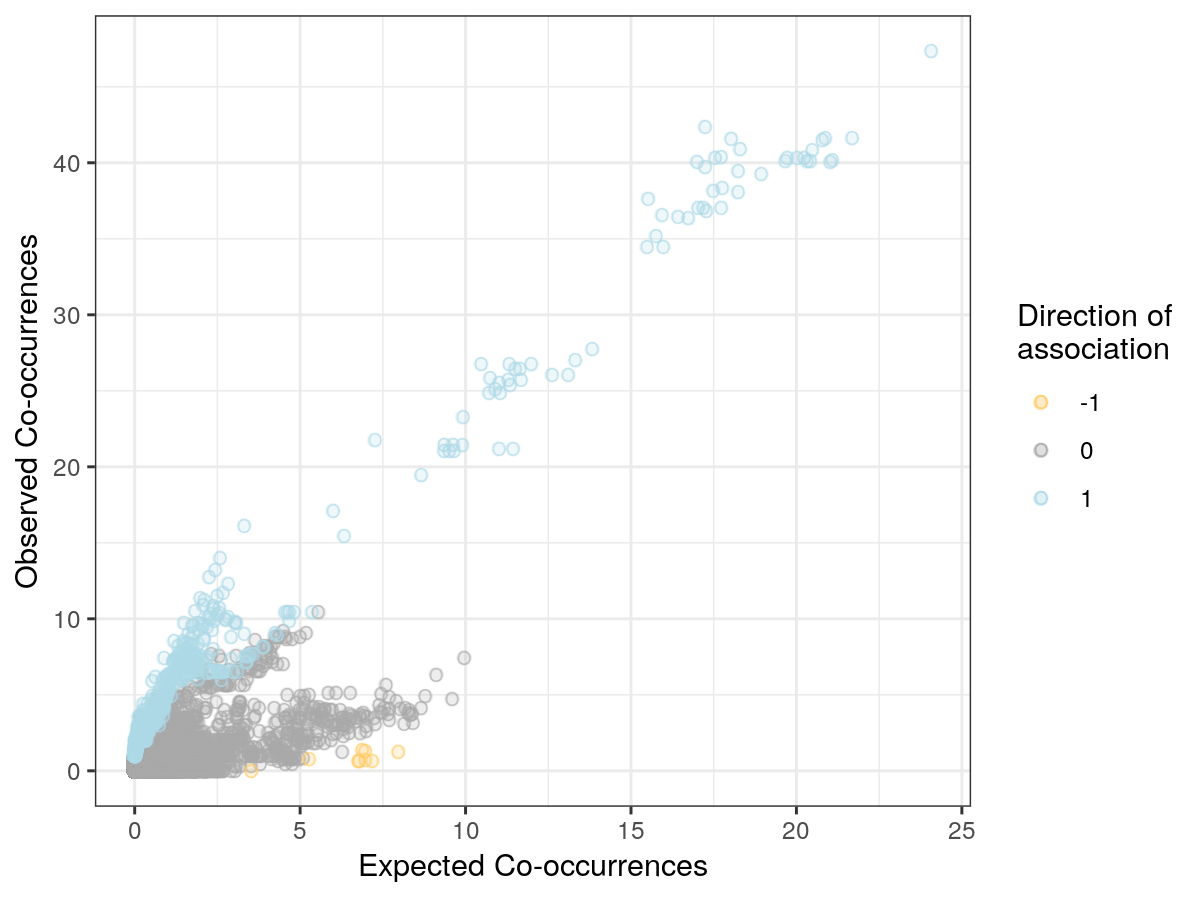

In [21]:
# plotting occurrences
p = eff %>%
    dt_filter(sign != 0) %>%
    ggplot(aes(x = exp_cooccur, y = obs_cooccur, color=as.character(sign))) + 
    geom_point(size=2, alpha=0.2,
               data = dt_filter(eff, sign == 0)) +
    geom_point(size=2, alpha=0.6, shape='O',
               data = dt_filter(eff, sign == 0), ) +
    geom_point(size=2, alpha=0.2) +
    geom_point(size=2, alpha=0.6, shape='O') +
    scale_color_manual('Direction of\nassociation', 
                       values=c("#FFCC66", "dark gray", "light blue")) +
    labs(x="Expected Co-occurrences", y="Observed Co-occurrences") +
    theme_bw()

p.dims(6,4.5)
plot(p)

In [17]:
# Summarizing by phylum
eff_s_p = eff %>%
    dt_mutate(n_edges = dt_n(), by=c(Phylum, i.Phylum)) %>%
    dt_summarize(perc_of_edges = dt_n() / first(n_edges) * 100, by=c(Phylum, i.Phylum, sign)) 

df.dims(30)
eff_s_p %>% dt_arrange(-perc_of_edges)
df.dims()

Phylum         i.Phylum       sign perc_of_edges
1  Euryarchaeota  Crenarchaeota   0   100.00000000 
2  Crenarchaeota  Crenarchaeota   1   100.00000000 
3  Crenarchaeota  Euryarchaeota   0   100.00000000 
4  Thaumarchaeota Euryarchaeota   0    99.72161002 
5  Euryarchaeota  Thaumarchaeota  0    99.51155975 
6  Euryarchaeota  Euryarchaeota   0    97.99545610 
7  Thaumarchaeota Crenarchaeota   0    94.59459459 
8  Thaumarchaeota Thaumarchaeota  0    83.93393393 
9  Thaumarchaeota Thaumarchaeota  1    16.06606607 
10 Thaumarchaeota Crenarchaeota   1     5.40540541 
11 Euryarchaeota  Euryarchaeota   1     1.98644872 
12 Euryarchaeota  Thaumarchaeota  1     0.48844025 
13 Thaumarchaeota Euryarchaeota   1     0.27838998 
14 Euryarchaeota  Euryarchaeota  -1     0.01809518

In [18]:
# Summarizing by phylum;class
eff_s_pc = eff %>%
    dt_mutate(n_edges = dt_n(), by=c(Phylum, Class, i.Phylum, i.Class)) %>%
    dt_summarize(perc_of_edges = dt_n() / first(n_edges) * 100, 
                 by=c(Phylum, Class, i.Phylum, i.Class, sign)) 

df.dims(50)
eff_s_pc %>% dt_arrange(-perc_of_edges)
df.dims()

Phylum         Class           i.Phylum       i.Class         sign
1  Euryarchaeota  Halobacteria    Euryarchaeota  Methanomicrobia  0  
2  Euryarchaeota  Halobacteria    Crenarchaeota  Bathyarchaeia    0  
3  Euryarchaeota  Methanomicrobia Crenarchaeota  Bathyarchaeia    0  
4  Crenarchaeota  Bathyarchaeia   Crenarchaeota  Bathyarchaeia    1  
5  Euryarchaeota  Halobacteria    Euryarchaeota  Thermoplasmata   0  
6  Crenarchaeota  Bathyarchaeia   Euryarchaeota  Thermoplasmata   0  
7  Euryarchaeota  Halobacteria    Euryarchaeota  Methanobacteria  0  
8  Crenarchaeota  Bathyarchaeia   Euryarchaeota  Methanobacteria  0  
9  Euryarchaeota  Halobacteria    Euryarchaeota  unclassified     0  
10 Euryarchaeota  Methanomicrobia Euryarchaeota  unclassified     0  
11 Thaumarchaeota Nitrososphaeria Euryarchaeota  unclassified     0  
12 Crenarchaeota  Bathyarchaeia   Euryarchaeota  unclassified     0  
13 Euryarchaeota  Methanobacteria Euryarchaeota  unclassified     0  
14 Euryarchaeota  unclassified    Euryarchaeota  unclassified     1  
15 Thaumarchaeota Nitrososphaeria Euryarchaeota  Methanobacteria  0  
16 Thaumarchaeota Nitrososphaeria Euryarchaeota  Thermoplasmata   0  
17 Euryarchaeota  Thermoplasmata  Euryarchaeota  Methanobacteria  0  
18 Euryarchaeota  Methanomicrobia Thaumarchaeota Nitrososphaeria  0  
19 Euryarchaeota  Halobacteria    Thaumarchaeota Nitrososphaeria  0  
20 Euryarchaeota  Methanomicrobia Euryarchaeota  Methanobacteria  0  
21 Euryarchaeota  Thermoplasmata  Euryarchaeota  unclassified     0  
22 Euryarchaeota  unclassified    Euryarchaeota  Methanobacteria  0  
23 Euryarchaeota  Methanomicrobia Euryarchaeota  Thermoplasmata   0  
24 Euryarchaeota  Methanobacteria Euryarchaeota  Methanobacteria  0  
25 Euryarchaeota  Thermoplasmata  Euryarchaeota  Thermoplasmata   0  
26 Euryarchaeota  Methanomicrobia Euryarchaeota  Methanomicrobia  0  
27 Thaumarchaeota Nitrososphaeria Crenarchaeota  Bathyarchaeia    0  
28 Euryarchaeota  Halobacteria    Euryarchaeota  Halobacteria     1  
29 Thaumarchaeota Nitrososphaeria Thaumarchaeota Nitrososphaeria  0  
30 Thaumarchaeota Nitrososphaeria Thaumarchaeota Nitrososphaeria  1  
31 Euryarchaeota  Halobacteria    Euryarchaeota  Halobacteria     0  
32 Thaumarchaeota Nitrososphaeria Crenarchaeota  Bathyarchaeia    1  
33 Euryarchaeota  Methanomicrobia Euryarchaeota  Methanomicrobia  1  
34 Euryarchaeota  Thermoplasmata  Euryarchaeota  Thermoplasmata   1  
35 Euryarchaeota  Methanobacteria Euryarchaeota  Methanobacteria  1  
36 Euryarchaeota  Methanomicrobia Euryarchaeota  Thermoplasmata   1  
37 Euryarchaeota  unclassified    Euryarchaeota  Methanobacteria  1  
38 Euryarchaeota  Thermoplasmata  Euryarchaeota  unclassified     1  
39 Euryarchaeota  Methanomicrobia Euryarchaeota  Methanobacteria  1  
40 Euryarchaeota  Halobacteria    Thaumarchaeota Nitrososphaeria  1  
41 Euryarchaeota  Methanomicrobia Thaumarchaeota Nitrososphaeria  1  
42 Euryarchaeota  Thermoplasmata  Euryarchaeota  Methanobacteria  1  
43 Thaumarchaeota Nitrososphaeria Euryarchaeota  Thermoplasmata   1  
44 Thaumarchaeota Nitrososphaeria Euryarchaeota  Methanobacteria  1  
45 Euryarchaeota  Methanobacteria Euryarchaeota  Methanobacteria -1  
   perc_of_edges
1  100.00000000 
2  100.00000000 
3  100.00000000 
4  100.00000000 
5  100.00000000 
6  100.00000000 
7  100.00000000 
8  100.00000000 
9  100.00000000 
10 100.00000000 
11 100.00000000 
12 100.00000000 
13 100.00000000 
14 100.00000000 
15  99.74123059 
16  99.62287869 
17  99.57936410 
18  99.51737452 
19  99.49949950 
20  99.27797834 
21  98.83720930 
22  98.51190476 
23  98.00498753 
24  97.28053707 
25  97.12070875 
26  96.49122807 
27  94.59459459 
28  84.30769231 
29  83.93393393 
30  16.06606607 
31  15.69230769 
32   5.40540541 
33   3.50877193 
34   2.87929125 
35   2.66825966 
36   1.99501247 
37   1.48809524 
38   1.16279070 
39   0.72202166 
40   0.50050050 
41   0.48262548 
42   0.42063590 
43   0.37712131 
44   0.25876941 
45   0.05120328

### Normalizing by number of nodes

In [22]:
# getting unique OTUs (& taxonomy)
n_nodes = eff %>%
    dt_select(sp1_name, sp2_name, Domain, Phylum, i.Domain, i.Phylum) %>%
    mutate(Tax1 = paste(Domain, Phylum, sp1_name, sep=';')) %>%
    mutate(Tax2 = paste(i.Domain, i.Phylum, sp2_name, sep=';')) 

n_nodes = c(n_nodes$Tax1 %>% as.vector %>% unique,
            n_nodes$Tax2 %>% as.vector %>% unique) %>%
    as.data.frame
colnames(n_nodes) = c('OTU')

n_nodes = n_nodes %>%
    dt_separate(OTU, c('Domain', 'Phylum', 'otu'), sep=';') %>%
    dt_distinct(Domain, Phylum, otu) %>%
    dt_summarize(n_OTUs = dt_n(), by=c(Domain, Phylum)) 

n_nodes 

Domain  Phylum         n_OTUs
1 Archaea Euryarchaeota  316   
2 Archaea Thaumarchaeota  37   
3 Archaea Crenarchaeota    2

In [23]:
# percent of nodes in taxonomic groups
x2 = eff_s_p %>%
    dt_inner_join(n_nodes, c('Phylum'='Phylum')) %>%
    dt_inner_join(n_nodes, c('i.Phylum'='Phylum')) %>%
    dt_summarize(edges_norm = dt_n() / (first(n_OTUs) + first(i.n_OTUs)),
              by=c(Phylum, i.Phylum, sign)) %>%
    dt_filter(sign != 0) %>%
    dt_mutate(edges_norm = round(edges_norm, 3)) %>%
    dt_arrange(sign, -edges_norm)

df.dims(30)
x2 
df.dims()

Phylum         i.Phylum       sign edges_norm
1 Euryarchaeota  Euryarchaeota  -1   0.002     
2 Crenarchaeota  Crenarchaeota   1   0.250     
3 Thaumarchaeota Crenarchaeota   1   0.026     
4 Thaumarchaeota Thaumarchaeota  1   0.014     
5 Thaumarchaeota Euryarchaeota   1   0.003     
6 Euryarchaeota  Thaumarchaeota  1   0.003     
7 Euryarchaeota  Euryarchaeota   1   0.002

## Graph

In [84]:
# convert to graph
G = eff %>%
    dt_select(-starts_with.('i.'), 
              -Domain, -Phylum, -Class, -Order, -Family, -Genus, -Species) %>%
    #dt_slice_head(n=1000) %>%      # debug
    as_tbl_graph
G

# A tbl_graph: 355 nodes and 62802 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 355 x 1 (active)
  name                            
  <chr>                           
1 c5fbed2bb10ab3a08275a92e9caea3c1
2 1936b1a270b058c5754be0addc7c7c31
3 6668cc03267d4f04b5a34d676c1db57a
4 6e9321684640a05dd16b7bc01b98c14a
5 2a64fe6cea748d320b2f99fe83449e46
6 0c59c44aeb355d3aa4dfa33ac4e77cde
# … with 349 more rows
#
# Edge Data: 62,802 x 12
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0           1            0     1     0     1     0
2     1     3           0           0            0     1     1     1     1
3     2     3           0           0            0     1     1     1     1
# … with 6.28e+04 more rows, and 3 more variables: mean_effects <dbl>,
#   sd_effects <dbl>, sign <int>

In [85]:
# adding taxonomy to nodes
## loading 
tax = physeq %>%
    phyloseq2df(tax_table)

## joining
G = G %>%
    activate(nodes) %>%
    inner_join(tax, c('name'='OTU'))
G

# A tbl_graph: 355 nodes and 62802 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 355 x 8 (active)
  name            Domain  Phylum    Class    Order     Family   Genus   Species 
  <chr>           <chr>   <chr>     <chr>    <chr>     <chr>    <chr>   <chr>   
1 c5fbed2bb10ab3… Archaea Euryarch… Halobac… Halobact… Halofer… Haloha… unclass…
2 1936b1a270b058… Archaea Euryarch… Halobac… Halobact… Halofer… Haloha… unclass…
3 6668cc03267d4f… Archaea Euryarch… Halobac… Halobact… Halofer… Haloha… unclass…
4 6e9321684640a0… Archaea Euryarch… Halobac… Halobact… Halofer… unclas… unclass…
5 2a64fe6cea748d… Archaea Euryarch… Halobac… Halobact… Halofer… unclas… unclass…
6 0c59c44aeb355d… Archaea Euryarch… Halobac… Halobact… Halofer… unclas… unclass…
# … with 349 more rows
#
# Edge Data: 62,802 x 12
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0 

In [86]:
# calculating weights based on effects
G = G %>%
    activate(edges) %>%
    mutate(weight = ifelse(mean_effects == 0, 1e-5, abs(mean_effects)))
G

# A tbl_graph: 355 nodes and 62802 edges
#
# A directed acyclic simple graph with 1 component
#
# Edge Data: 62,802 x 13 (active)
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0       1                0     1 0         1     0
2     1     3           0       0                0     1 1         1     1
3     2     3           0       0                0     1 1         1     1
4     1     4           0       1                0     1 0         1     0
5     2     4           0       1                0     1 0         1     0
6     3     4           0       0.346            0     1 0.654     1     1
# … with 6.28e+04 more rows, and 4 more variables: mean_effects <dbl>,
#   sd_effects <dbl>, sign <int>, weight <dbl>
#
# Node Data: 355 x 8
  name             Domain  Phylum    Class    Order    Family    Genus  Species 
  <chr>            <chr>   <chr>     <chr>    <c

In [87]:
# centrality 
G = G %>%
    activate(nodes) %>%
    mutate(centrality_btw = centrality_betweenness(weights=weight),
           centrality_hub = centrality_hub(weights=weight),
           centrality_degree = centrality_degree(weights=weight))
G

# A tbl_graph: 355 nodes and 62802 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 355 x 11 (active)
  name  Domain Phylum Class Order Family Genus Species centrality_btw
  <chr> <chr>  <chr>  <chr> <chr> <chr>  <chr> <chr>            <dbl>
1 c5fb… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…           0   
2 1936… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…           0   
3 6668… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…          46   
4 6e93… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…           0   
5 2a64… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…           0   
6 0c59… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…           6.40
# … with 349 more rows, and 2 more variables: centrality_hub <dbl>,
#   centrality_degree <dbl>
#
# Edge Data: 62,802 x 13
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0           1   

### Centrality

In [112]:
# summary
df.dims(30)
G %>% 
    activate(edges) %>%
    filter(sign != 0) %>%
    activate(nodes) %>%
    as.data.frame %>%
    group_by(Phylum, Class, Order, Family) %>%
    summarize(mean_centrality_btw = mean(centrality_btw),
              mean_centrality_hub = mean(centrality_hub),
              mean_centrality_degree = mean(centrality_degree)) %>%
    ungroup() %>%
    arrange(-mean_centrality_btw)
df.dims()

Phylum         Class           Order                  
1  Crenarchaeota  Bathyarchaeia   unclassified           
2  Crenarchaeota  Bathyarchaeia   unidentified archaeon  
3  Euryarchaeota  Thermoplasmata  Methanomassiliicoccales
4  Euryarchaeota  unclassified    unclassified           
5  Euryarchaeota  Methanobacteria Methanobacteriales     
6  Euryarchaeota  Methanomicrobia Methanomicrobiales     
7  Euryarchaeota  Methanomicrobia Methanosarcinales      
8  Euryarchaeota  Methanobacteria Methanobacteriales     
9  Thaumarchaeota Nitrososphaeria Nitrososphaerales      
10 Euryarchaeota  Halobacteria    Halobacteriales        
11 Euryarchaeota  Methanomicrobia unclassified           
12 Euryarchaeota  Halobacteria    Halobacteriales        
13 Euryarchaeota  Thermoplasmata  Methanomassiliicoccales
14 Euryarchaeota  Methanomicrobia Methanosarcinales      
15 Euryarchaeota  Halobacteria    Halobacteriales        
   Family                   mean_centrality_btw mean_centrality_hub
1  unclassified             984.5496384         0.02422867         
2  unidentified archaeon    984.5496384         0.02423522         
3  Methanomethylophilaceae  308.0151254         0.03781792         
4  unclassified             198.7014679         0.04287468         
5  Methanobacteriaceae      154.2040310         0.05536125         
6  Methanocorpusculaceae    105.3283270         0.03874370         
7  Methanosarcinaceae        47.9383712         0.03697500         
8  Methanothermobacteraceae  23.8535460         0.46719836         
9  Nitrososphaeraceae        21.0287049         0.05019246         
10 Halococcaceae             20.0000000         0.02546610         
11 unclassified              13.3319851         0.04257277         
12 Haloferacaceae             4.9141158         0.01701236         
13 Methanomassiliicoccaceae   2.7418356         0.02797897         
14 Methanosaetaceae           0.2765625         0.03260919         
15 Halomicrobiaceae           0.0000000         0.01890187         
   mean_centrality_degree
1  0.10800000            
2  0.11709091            
3  0.25544203            
4  0.32371358            
5  0.33257507            
6  0.30795639            
7  0.38218981            
8  1.28097795            
9  0.39776643            
10 0.15554880            
11 0.50813445            
12 0.19433937            
13 0.22036997            
14 0.27643214            
15 0.08946312

In [126]:
G_f = G %>%
    activate(edges) %>%
    filter(sign != 0) %>%
    activate(nodes) %>%
    mutate(community = as.factor(group_walktrap(weights=weight))) %>%
    mutate(centrality_btw = centrality_betweenness(weights=weight),
           centrality_hub = centrality_hub(weights=weight),
           centrality_degree = centrality_degree(weights=weight),
           d = local_ave_degree()) %>%
    filter(!is.na(d)) 
G_f 

# A tbl_graph: 313 nodes and 1148 edges
#
# A directed acyclic simple graph with 20 components
#
# Node Data: 313 x 13 (active)
  name  Domain Phylum Class Order Family Genus Species centrality_btw
  <chr> <chr>  <chr>  <chr> <chr> <chr>  <chr> <chr>            <dbl>
1 c5fb… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…          0    
2 1936… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…          0.305
3 6668… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…          0    
4 6e93… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…          0.920
5 2a64… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…          0.920
6 0c59… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…          0.920
# … with 307 more rows, and 4 more variables: centrality_hub <dbl>,
#   centrality_degree <dbl>, community <fct>, d <dbl>
#
# Edge Data: 1,148 x 13
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2 

### Assortativity

In [268]:
# assortivity
assort_by_tax_lev = function(G){
    L = list()
    L[['Phylum']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    L[['Class']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, Class, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    L[['Order']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, Class, Order, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    L[['Family']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, Class, Order, Family, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    L[['Genus']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, Class, Order, Family, Genus, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    assort_by_tax = L %>% unlist %>% as.data.frame
    colnames(assort_by_tax) = c('assortativity')
    assort_by_tax$tax_level = rownames(assort_by_tax)
    return(assort_by_tax)
}

assort_by_tax = G_f %>%
    activate(edges) %>%
    filter(sign == 1) %>%
    assort_by_tax_lev()
df.dims(10)
assort_by_tax
df.dims()

assortativity tax_level
Phylum 0.8156982     Phylum   
Class  0.7374349     Class    
Order  0.7312325     Order    
Family 0.6599959     Family   
Genus  0.3636169     Genus

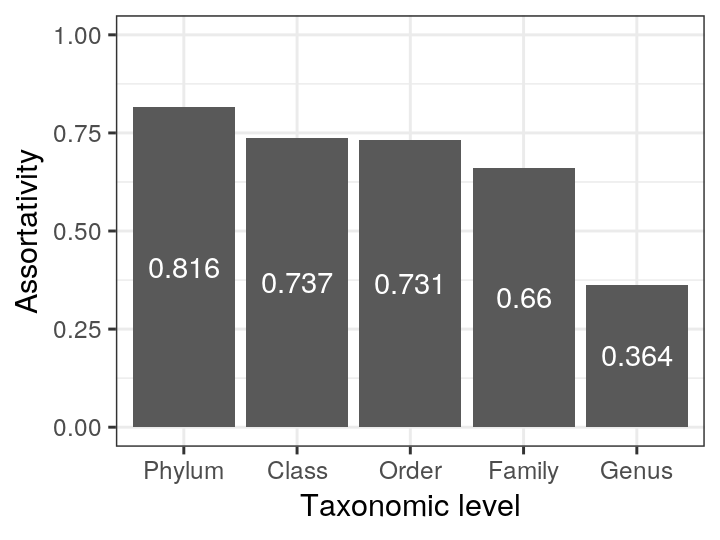

In [270]:
# plotting
tax_levs = c('Phylum', 'Class', 'Order', 'Family', 'Genus')
p = assort_by_tax %>%
    mutate(tax_level = factor(tax_level, levels=tax_levs)) %>%
    ggplot(aes(tax_level, assortativity)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=round(assortativity, 3), y=assortativity/2), 
              size=3.7, color='white') +
    scale_y_continuous(limits=c(0,1)) +
    labs(x='Taxonomic level', y='Assortativity') +
    theme_bw()

p.dims(3.6,2.7)
plot(p)

#### Versus null model

*  simulating 100 random networks
* same number of edges as true network, but randomly assigned

In [271]:
# simulating 100 random networks
## same number of edges, but random
n_edges = G %>%
    activate(edges) %>%
    filter(sign == 1) %>%
    as.data.frame %>%
    nrow
n_edges

[1] 1139

In [272]:
# function to simulate a graph with random edges 
sim_graph = function(G){
    all_nodes = G %>%
        activate(nodes) %>%
        as.data.frame %>%
        .$name %>% unique
    #cat('Number of nodes:', length(all_nodes), '\n')
    df_edges = combn(1:length(all_nodes),m=2)
    df_edges = df_edges[,sample(1:ncol(df_edges), n_edges)]
    df_edges = data.frame(to=df_edges[1,],
                          from=df_edges[2,],
                          sign=1)
    #cat('Number of edges:', nrow(df_edges), '\n')
    G %>%
        activate(edges) %>%
        filter(sign == 1e9) %>%
        bind_edges(df_edges) 
}

G %>%
    activate(edges) %>%
    filter(sign == 1) %>%
    sim_graph()    

# A tbl_graph: 355 nodes and 1139 edges
#
# A directed acyclic simple graph with 2 components
#
# Edge Data: 1,139 x 13 (active)
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1    92    37          NA          NA           NA    NA    NA    NA    NA
2   220    99          NA          NA           NA    NA    NA    NA    NA
3   212   120          NA          NA           NA    NA    NA    NA    NA
4    73    50          NA          NA           NA    NA    NA    NA    NA
5   102    68          NA          NA           NA    NA    NA    NA    NA
6   303   225          NA          NA           NA    NA    NA    NA    NA
# … with 1,133 more rows, and 4 more variables: mean_effects <dbl>,
#   sd_effects <dbl>, sign <dbl>, weight <dbl>
#
# Node Data: 355 x 11
  name  Domain Phylum Class Order Family Genus Species centrality_btw
  <chr> <chr>  <chr>  <chr> <chr> <chr>  <chr> <chr>          

In [273]:
# function to run simuation & assortativity 
assort_each = function(sim_rep, G){
    df = sim_graph(G) %>%
        assort_by_tax_lev 
    df$sim_rep = sim_rep
    return(df)
}

G_tmp = G %>%
    activate(edges) %>%
    filter(sign == 1)

n_sim_reps = 100
assort_null = 1:n_sim_reps %>%
    lapply(assort_each, G=G_tmp) %>%
    do.call(rbind, .)
assort_null

assortativity tax_level sim_rep
Phylum   -0.02514914   Phylum    1      
Class     0.01165388   Class     1      
⋮        ⋮             ⋮         ⋮      
Family99  0.005550435  Family    100    
Genus99  -0.011375572  Genus     100

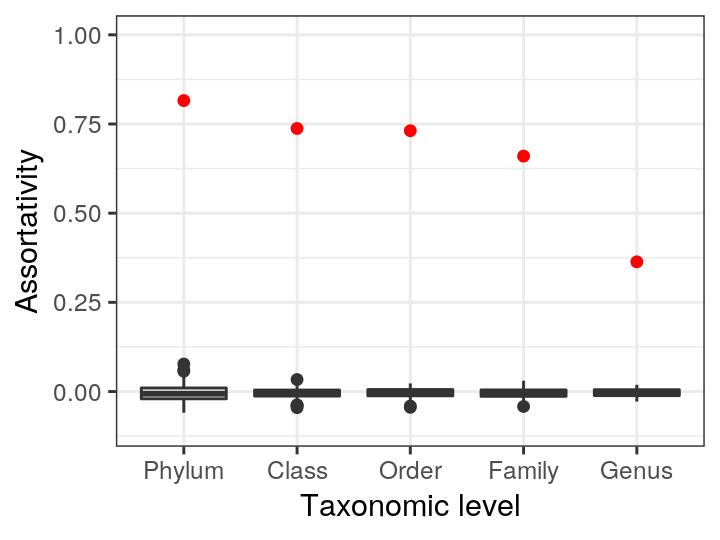

In [274]:
# plotting
p = assort_null %>%
    mutate(tax_level = tax_level %>% factor(levels=tax_levs)) %>%
    ggplot(aes(tax_level, assortativity)) + 
    geom_boxplot() +
    geom_point(data=assort_by_tax, color='red') +
    scale_y_continuous(limits=c(-0.1, 1)) +
    labs(x='Taxonomic level', y='Assortativity') +
    theme_bw() 

p.dims(3.6,2.7)
plot(p)

In [275]:
# p-value calc
df.dims(20)
assort_by_tax %>%
    inner_join(assort_null, c('tax_level')) %>%
    group_by(tax_level) %>%
    summarize(p_val = 1 - (sum(assortativity.x > assortativity.y) / n_sim_reps))
df.dims()

tax_level p_val
1 Class     0    
2 Family    0    
3 Genus     0    
4 Order     0    
5 Phylum    0

### Plotting

#### Top 6 subnetworks

In [173]:
# frac of nodes
G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 6) %>%
    as.data.frame %>%
    nrow

G_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    nrow

[1] 151

[1] 313

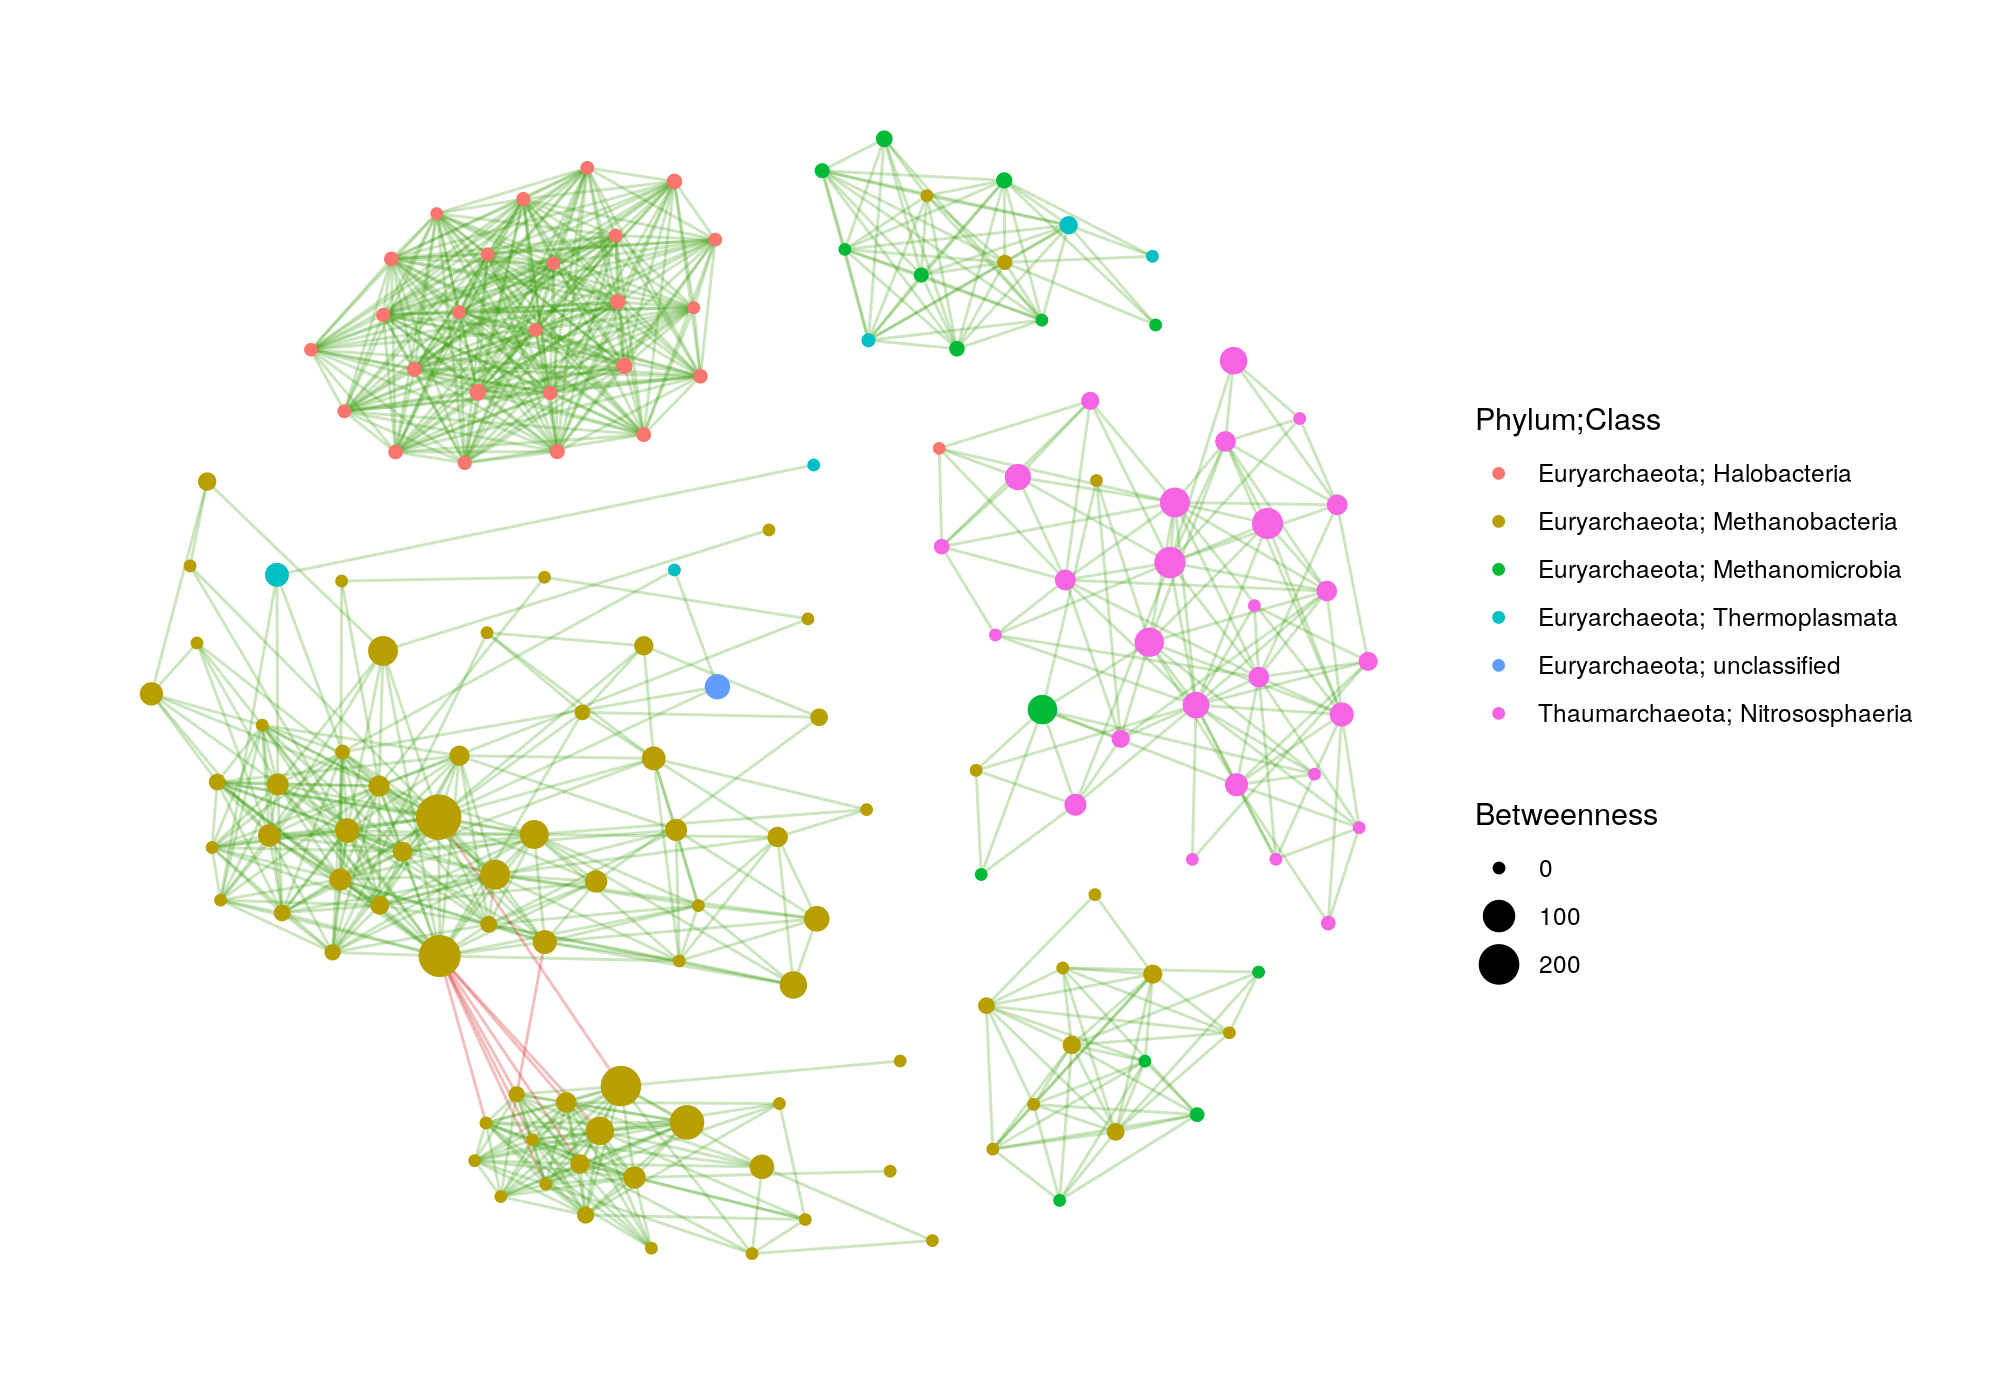

In [134]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Taxonomy = paste(Phylum, Class, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy)) +
    scale_color_discrete('Phylum;Class') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
    theme_graph(base_family = 'Helvetica') 

p.dims(10,7)
plot(p)

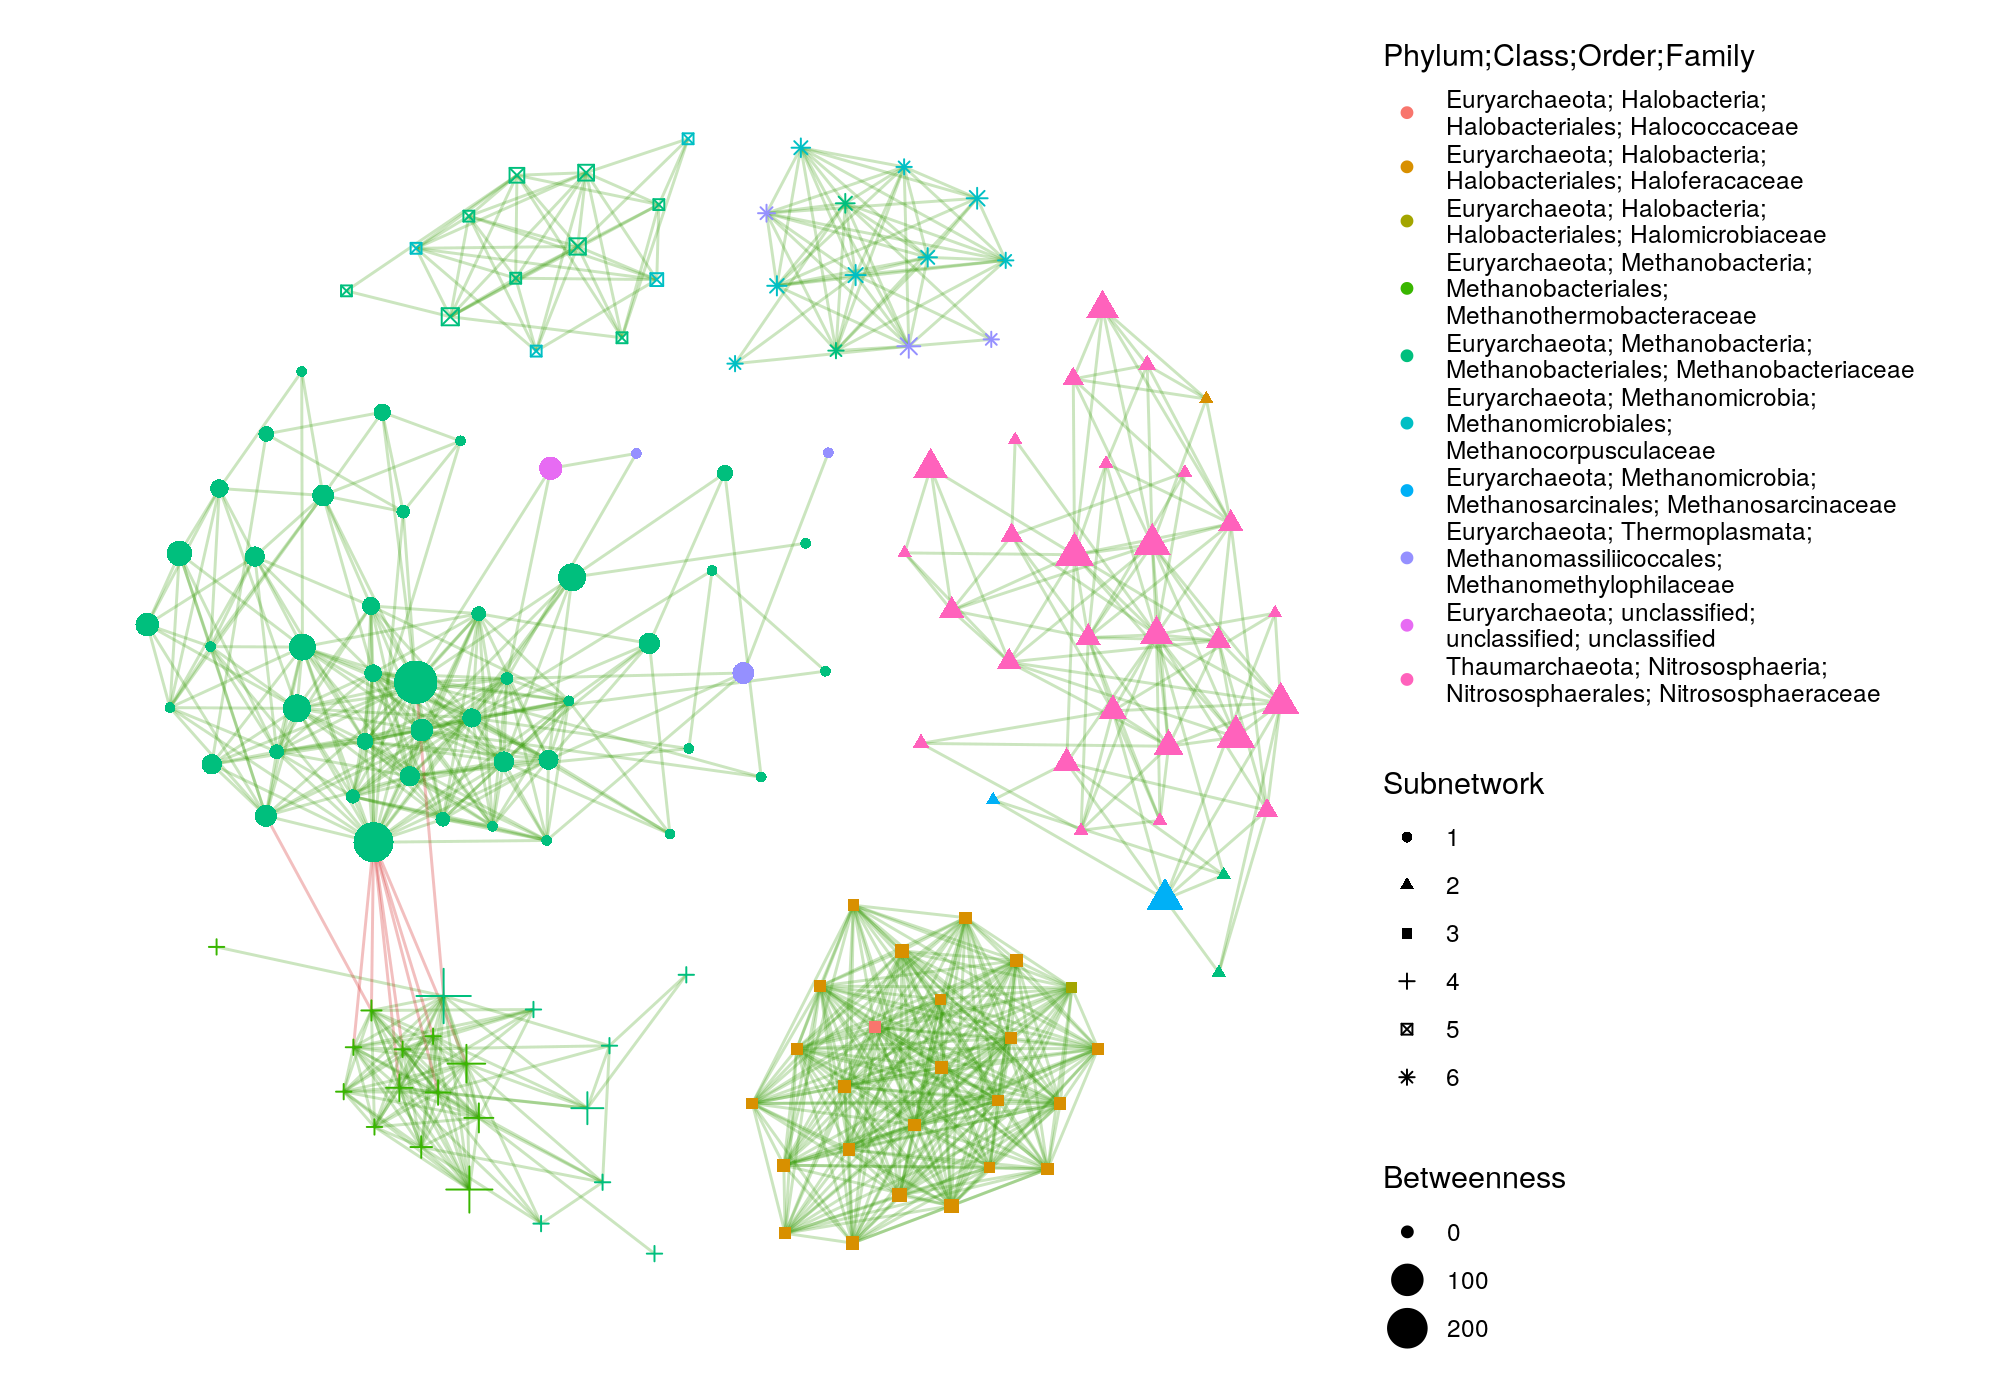

In [259]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy, shape=community)) +
    scale_color_discrete('Phylum;Class;Order;Family') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
    scale_shape_discrete('Subnetwork') +
    theme_graph(base_family = 'Helvetica') 

p.dims(10,7)
plot(p)

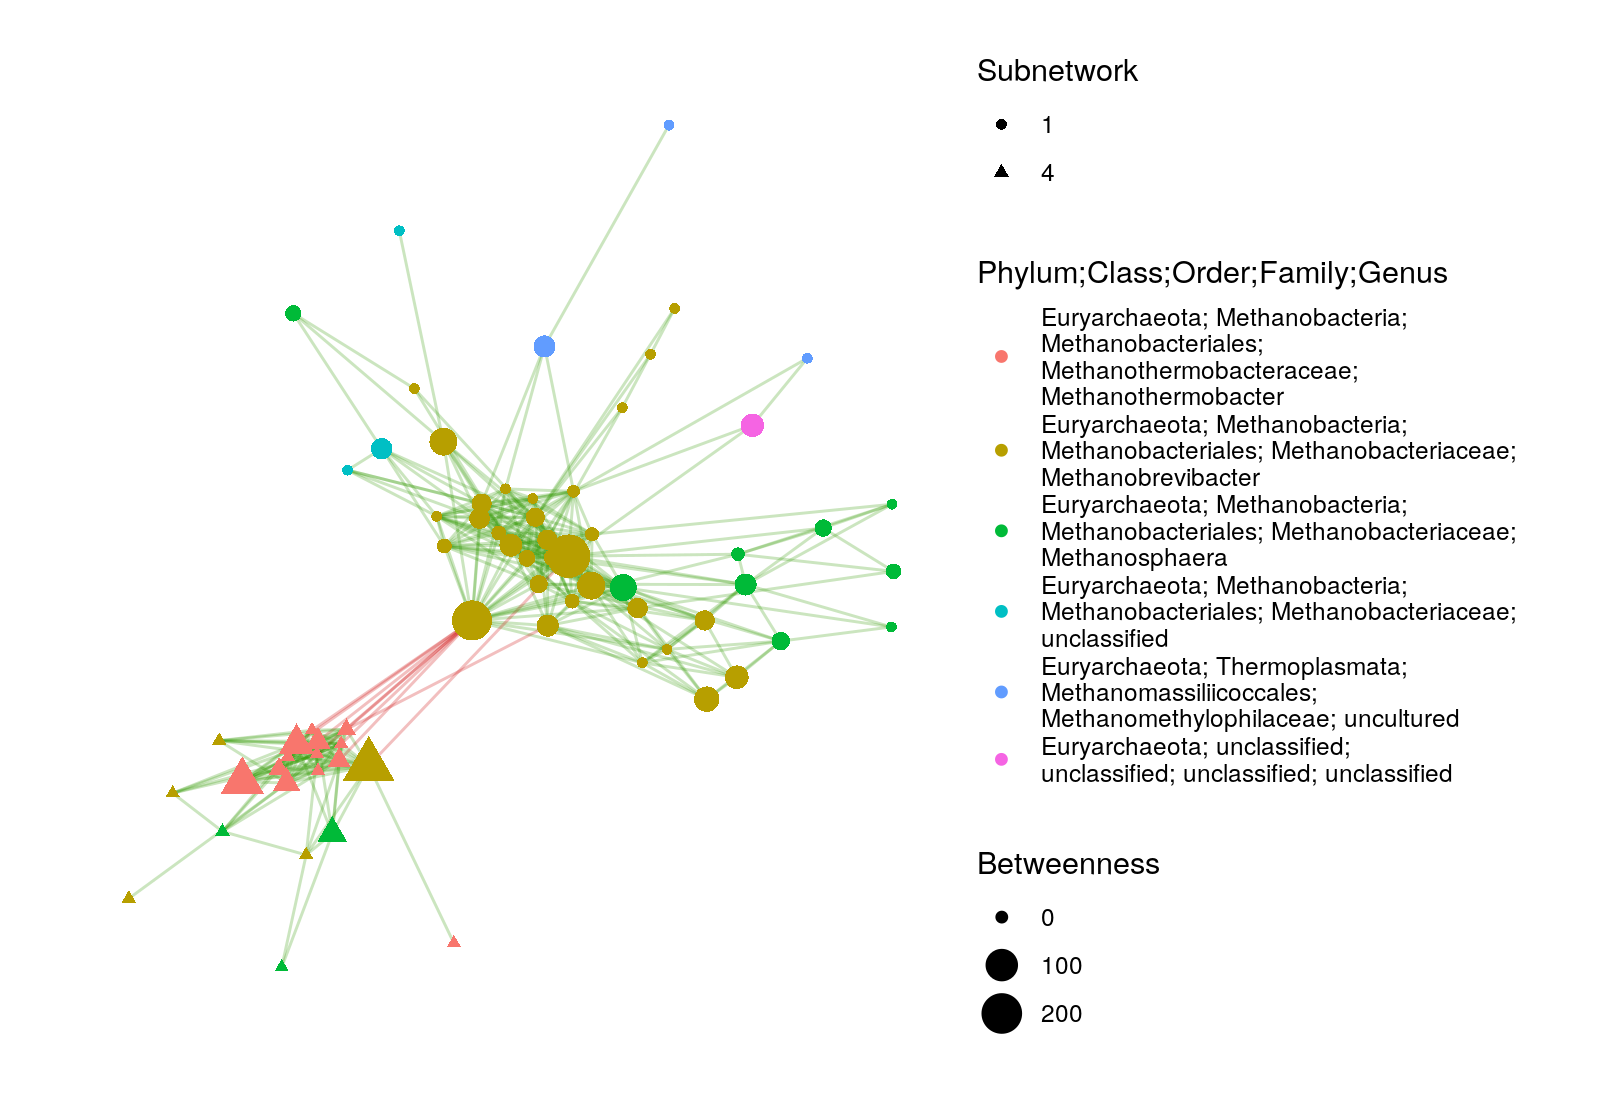

In [172]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) %in% c(1,4)) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, Genus, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy, shape=community)) +
    scale_color_discrete('Phylum;Class;Order;Family;Genus') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_shape_discrete('Subnetwork') +
    scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
    theme_graph(base_family = 'Helvetica') 

p.dims(8,5.5)
plot(p)

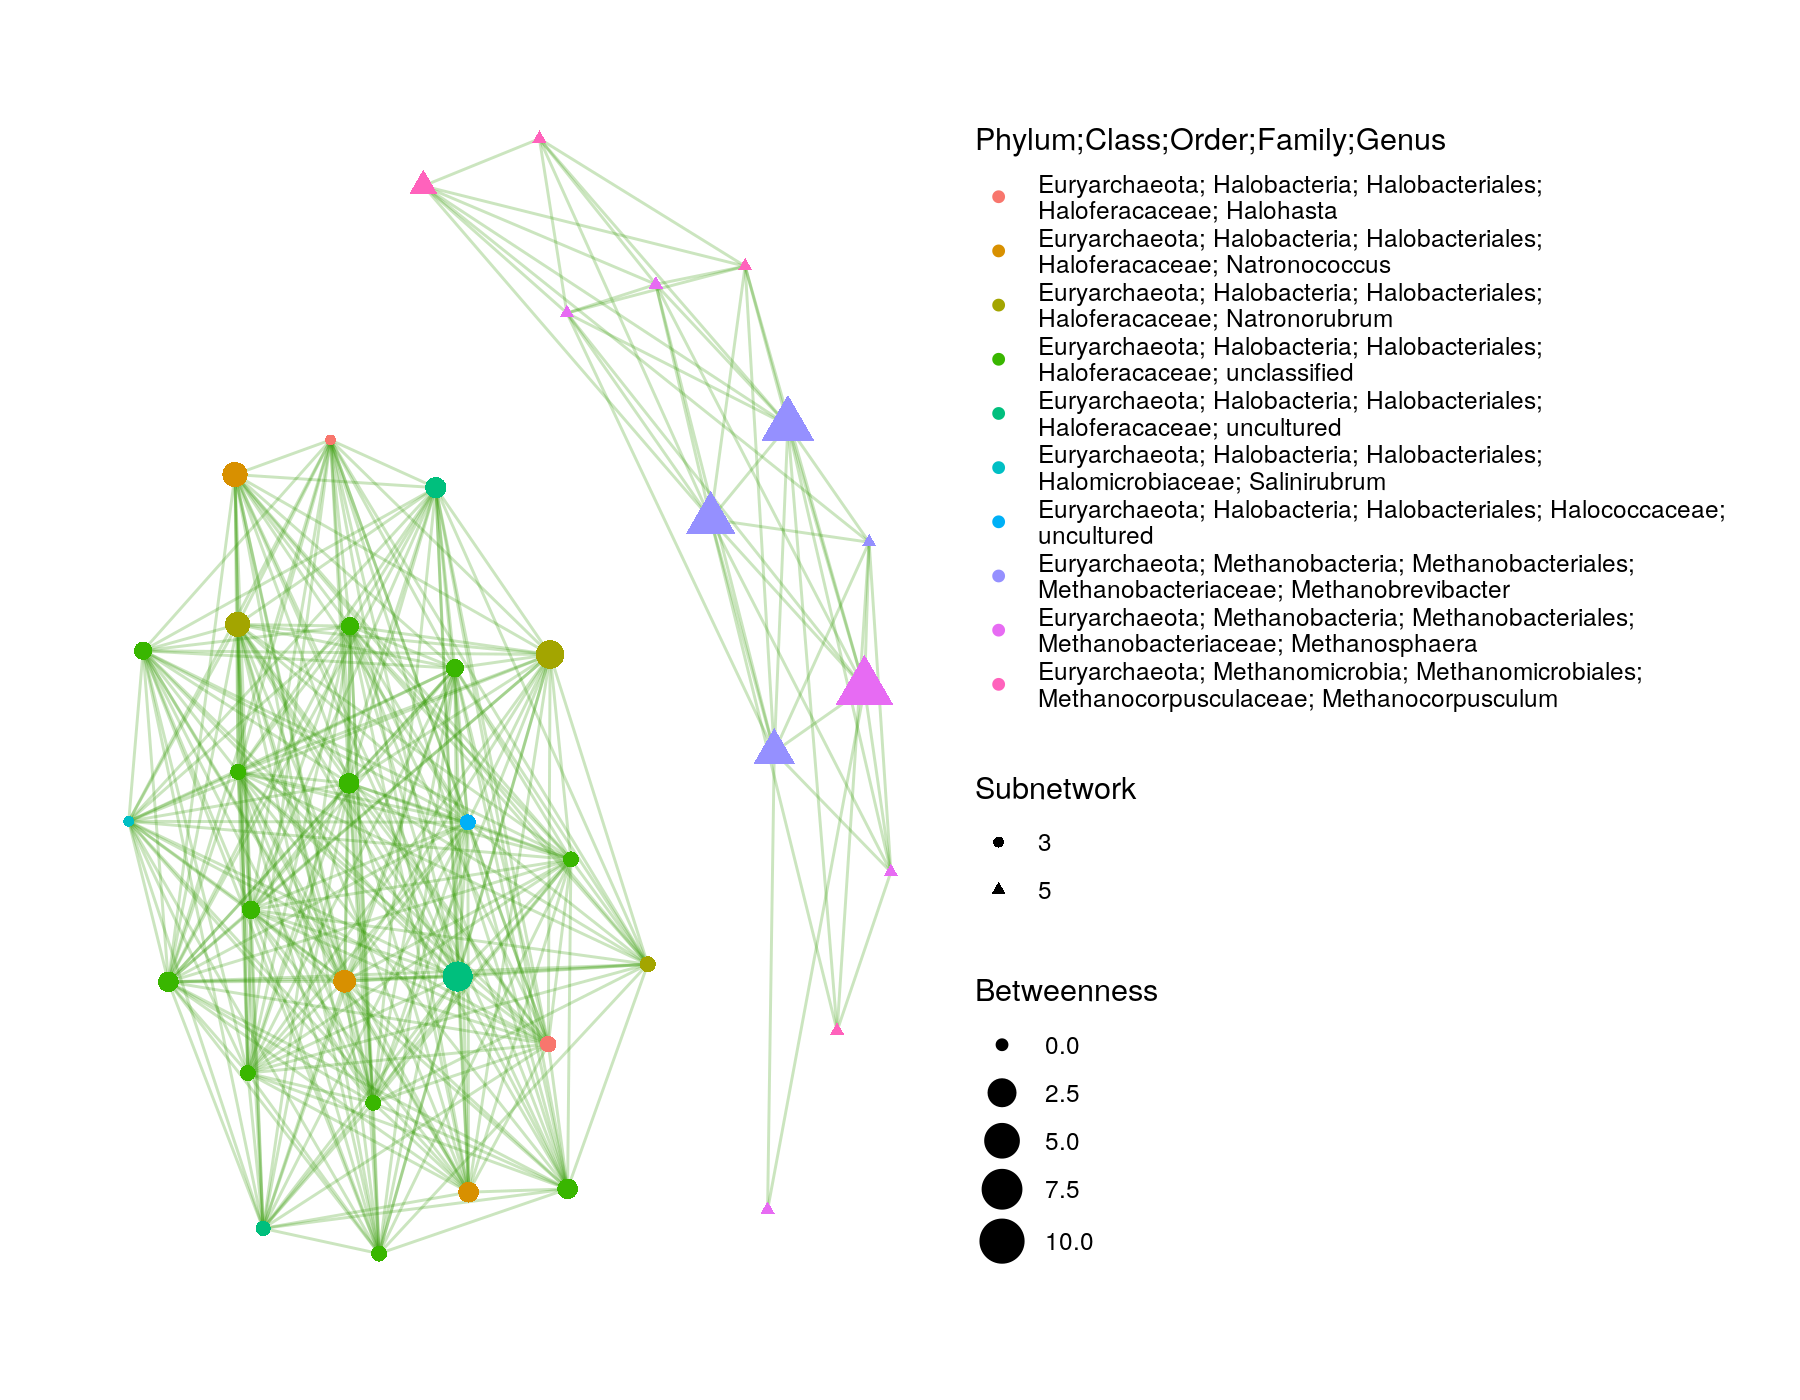

In [267]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) %in% c(3,5)) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, Genus, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 60)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy, shape=community)) +
    scale_color_discrete('Phylum;Class;Order;Family;Genus') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_shape_discrete('Subnetwork') +
    scale_edge_color_manual(values=c('#339900')) + 
    theme_graph(base_family = 'Helvetica') 

p.dims(9,7)
plot(p)

#### Top 19 subnetworks

In [170]:
# frac of nodes
G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 19) %>%
    as.data.frame %>%
    nrow

G_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    nrow

[1] 238

[1] 313

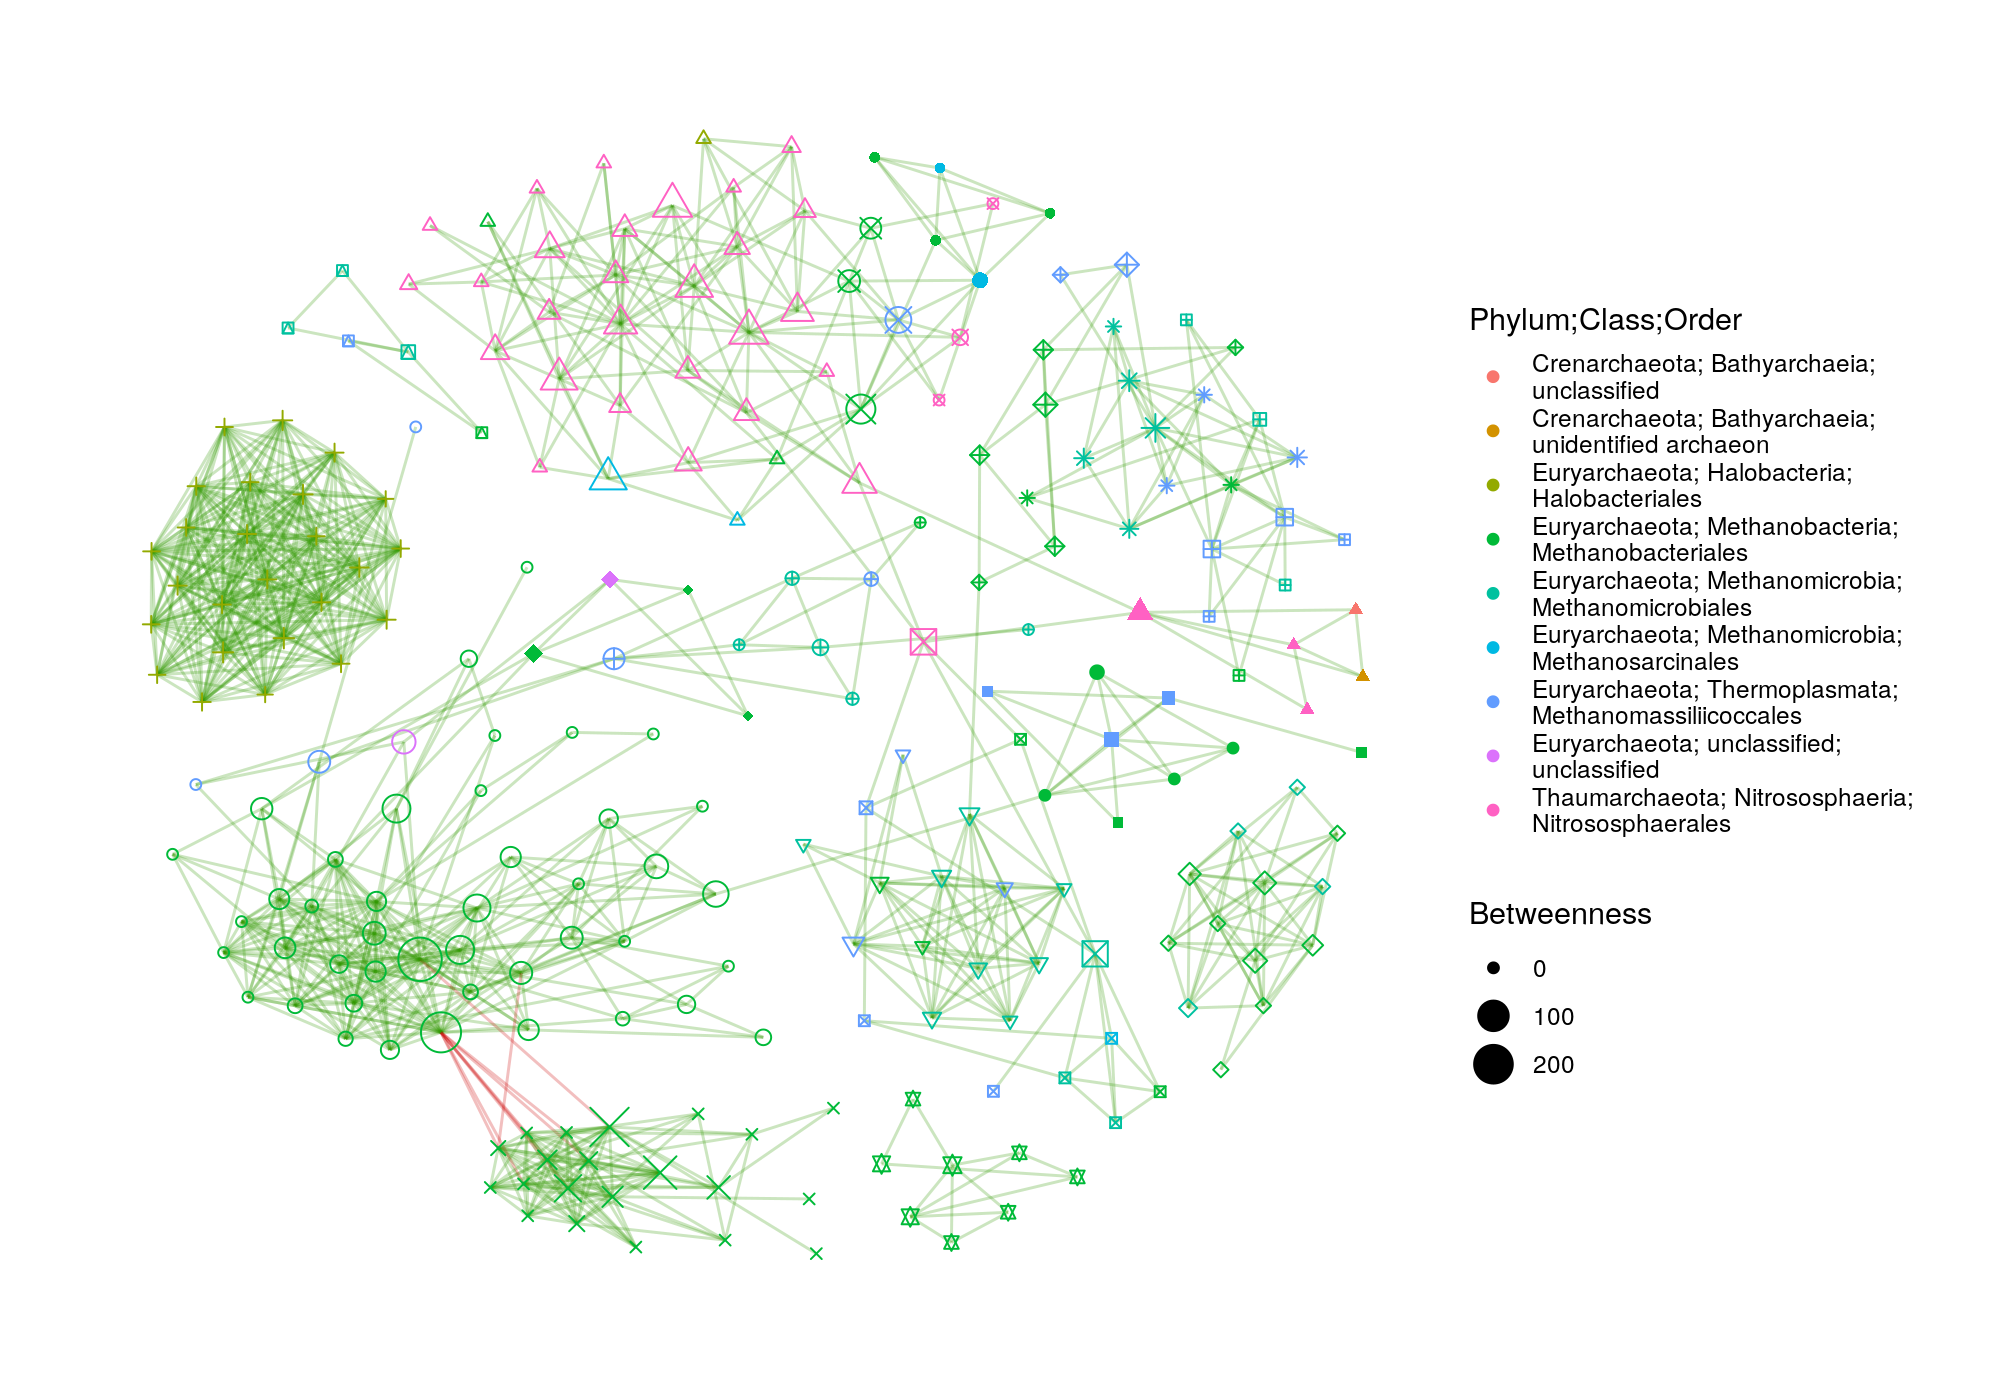

In [169]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 19) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy, shape=community)) +
    scale_color_discrete('Phylum;Class;Order') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
    scale_shape_manual('Subnetwork', values=1:19) +
    theme_graph(base_family = 'Helvetica') +
    guides(shape=FALSE)

p.dims(10,7)
plot(p)

#### Summary

In [148]:
# formatting
df = G_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    unite(Taxonomy, Phylum, Class, Order, Family, Genus, sep='; ') %>%
    group_by(Taxonomy, community) %>%
    mutate(centrality_btw_mean = mean(centrality_btw)) %>%
    ungroup() %>%
    filter(centrality_btw_mean > 5)
df 

name                             Domain 
1   e3e571be3293bddcadd6be6a621d137b Archaea
2   669563302fb65e3b5f7097564fd8b880 Archaea
⋮   ⋮                                ⋮      
118 890c6bb9fc8dea9dc4b756a645f4f472 Archaea
119 b171d5cdecd235e7199d44ce8991794d Archaea
    Taxonomy                                                                                   
1   Euryarchaeota; Methanomicrobia; Methanosarcinales; Methanosarcinaceae; Methanosarcina      
2   Euryarchaeota; Methanomicrobia; Methanosarcinales; Methanosarcinaceae; Methanosarcina      
⋮   ⋮                                                                                          
118 Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter
119 Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter
    Species           centrality_btw centrality_hub centrality_degree community
1   unclassified      0              0              0.07764545        2        
2   unclassified      7              0              0.07181818        16       
⋮   ⋮                 ⋮              ⋮              ⋮                 ⋮        
118 Haemonchus placei 1              0.0004999594   0.06950909        1        
119 Haemonchus placei 0              0.0000000000   0.00000000        1        
    d        centrality_btw_mean
1   8.75     36.5               
2   5.75      7.0               
⋮   ⋮        ⋮                  
118 16.29412 32.3871            
119 18.16667 32.3871

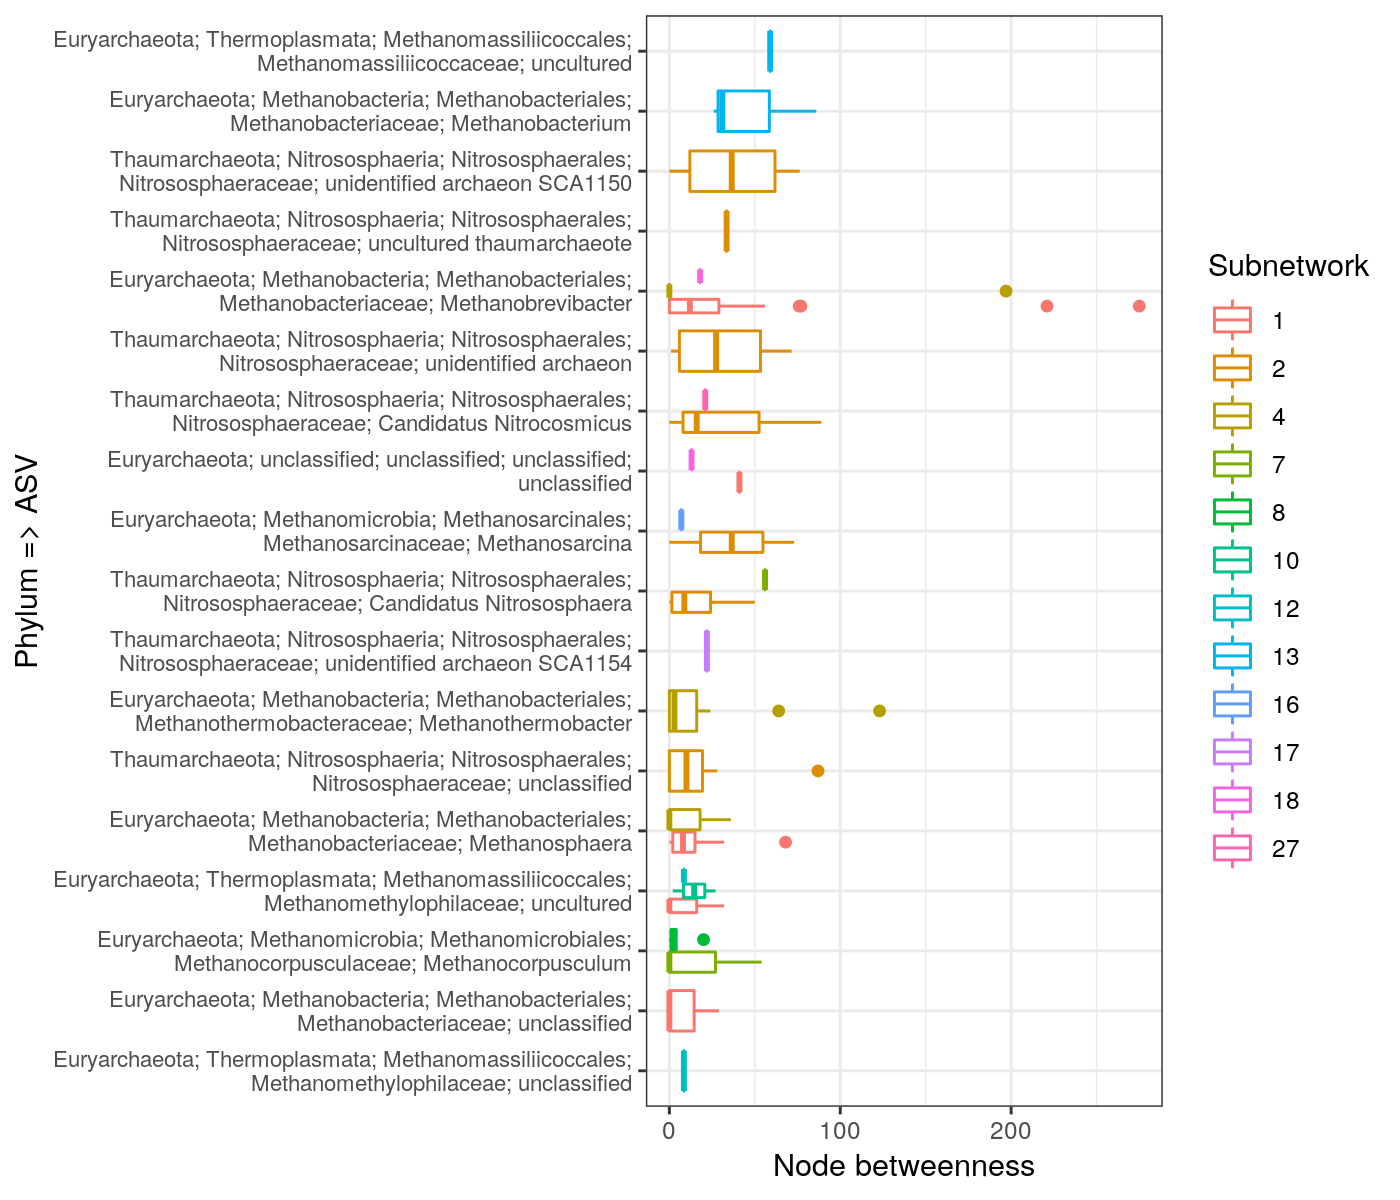

In [152]:
p = df %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 60),
           Taxonomy = Taxonomy %>% reorder(centrality_btw_mean)) %>%
    ggplot(aes(Taxonomy, centrality_btw, color=community)) +
    geom_boxplot() +
    #geom_bar(stat='identity', position='dodge') +
    scale_color_discrete('Subnetwork') +
    labs(x='Phylum => ASV', y='Node betweenness') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    )

p.dims(7,6)
plot(p)

In [144]:
# formatting
df = G_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    unite(Taxonomy, Phylum, Class, Order, Family, Genus, name, sep='; ') %>%
    dplyr::select(Taxonomy, community, centrality_btw) %>%
    filter(centrality_btw > 50) %>%
    arrange(-centrality_btw) 
df.dims(30)
df 
df.dims()

Taxonomy                                                                                                                               
1  Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter; 7e0c07ff124e74c3bb84dcf739b5e628          
2  Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter; 75c0ac2e8183f55a9e3e44136fecf0f0          
3  Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter; 81191d01a991c117442a0bdbe7b703a0          
4  Euryarchaeota; Methanobacteria; Methanobacteriales; Methanothermobacteraceae; Methanothermobacter; 44b7dc118025469372b59842c13d8642    
5  Thaumarchaeota; Nitrososphaeria; Nitrososphaerales; Nitrososphaeraceae; Candidatus Nitrocosmicus; e569d58f2813d042dd490d75c6149977     
6  Thaumarchaeota; Nitrososphaeria; Nitrososphaerales; Nitrososphaeraceae; unclassified; 26075464d90c00eed3fba432006973f6                 
7  Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobacterium; fef7f12170973768f687441336fa56f2            
8  Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter; 51b4c7375044ab705c5970d83909bf38          
9  Thaumarchaeota; Nitrososphaeria; Nitrososphaerales; Nitrososphaeraceae; unidentified archaeon SCA1150; 9deec86fd0fc5c906d2a8cebc4c790a7
10 Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter; 3702f63dc4110cb009ea4cad61add2a6          
11 Euryarchaeota; Methanomicrobia; Methanosarcinales; Methanosarcinaceae; Methanosarcina; 7eb844d11ae3d98e99fb823dc381bfaf                
12 Thaumarchaeota; Nitrososphaeria; Nitrososphaerales; Nitrososphaeraceae; unidentified archaeon; 12b5b1fa67f5284ceb732ed5cb6394c2        
13 Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanosphaera; 1f1f87cab902b66753b8bbd81e69a7d4              
14 Euryarchaeota; Methanobacteria; Methanobacteriales; Methanothermobacteraceae; Methanothermobacter; 9b65d80384f334ccb3620c5cd34343a5    
15 Euryarchaeota; Thermoplasmata; Methanomassiliicoccales; Methanomassiliicoccaceae; uncultured; 3b30f3f3bc82c26c4c2a2d4a97b95546         
16 Thaumarchaeota; Nitrososphaeria; Nitrososphaerales; Nitrososphaeraceae; unidentified archaeon SCA1150; bc580aeffdc16e73f816510acd07e118
17 Thaumarchaeota; Nitrososphaeria; Nitrososphaerales; Nitrososphaeraceae; Candidatus Nitrososphaera; 25f804bce59db6fc9261c3c612bd25aa    
18 Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter; 7c812957d3a1f99b47def9ff1e0895fc          
19 Euryarchaeota; Methanomicrobia; Methanomicrobiales; Methanocorpusculaceae; Methanocorpusculum; d2d366c050072278a47eda64a6dc19c0        
   community centrality_btw
1  1         275.00        
2  1         221.00        
3  4         197.00        
4  4         123.00        
5  2          89.00        
6  2          87.00        
7  13         86.00        
8  1          77.00        
9  2          76.25        
10 1          76.00        
11 2          73.00        
12 2          71.50        
13 1          68.00        
14 4          64.00        
15 13         59.00        
16 2          57.00        
17 7          56.00        
18 1          56.00        
19 7          54.00

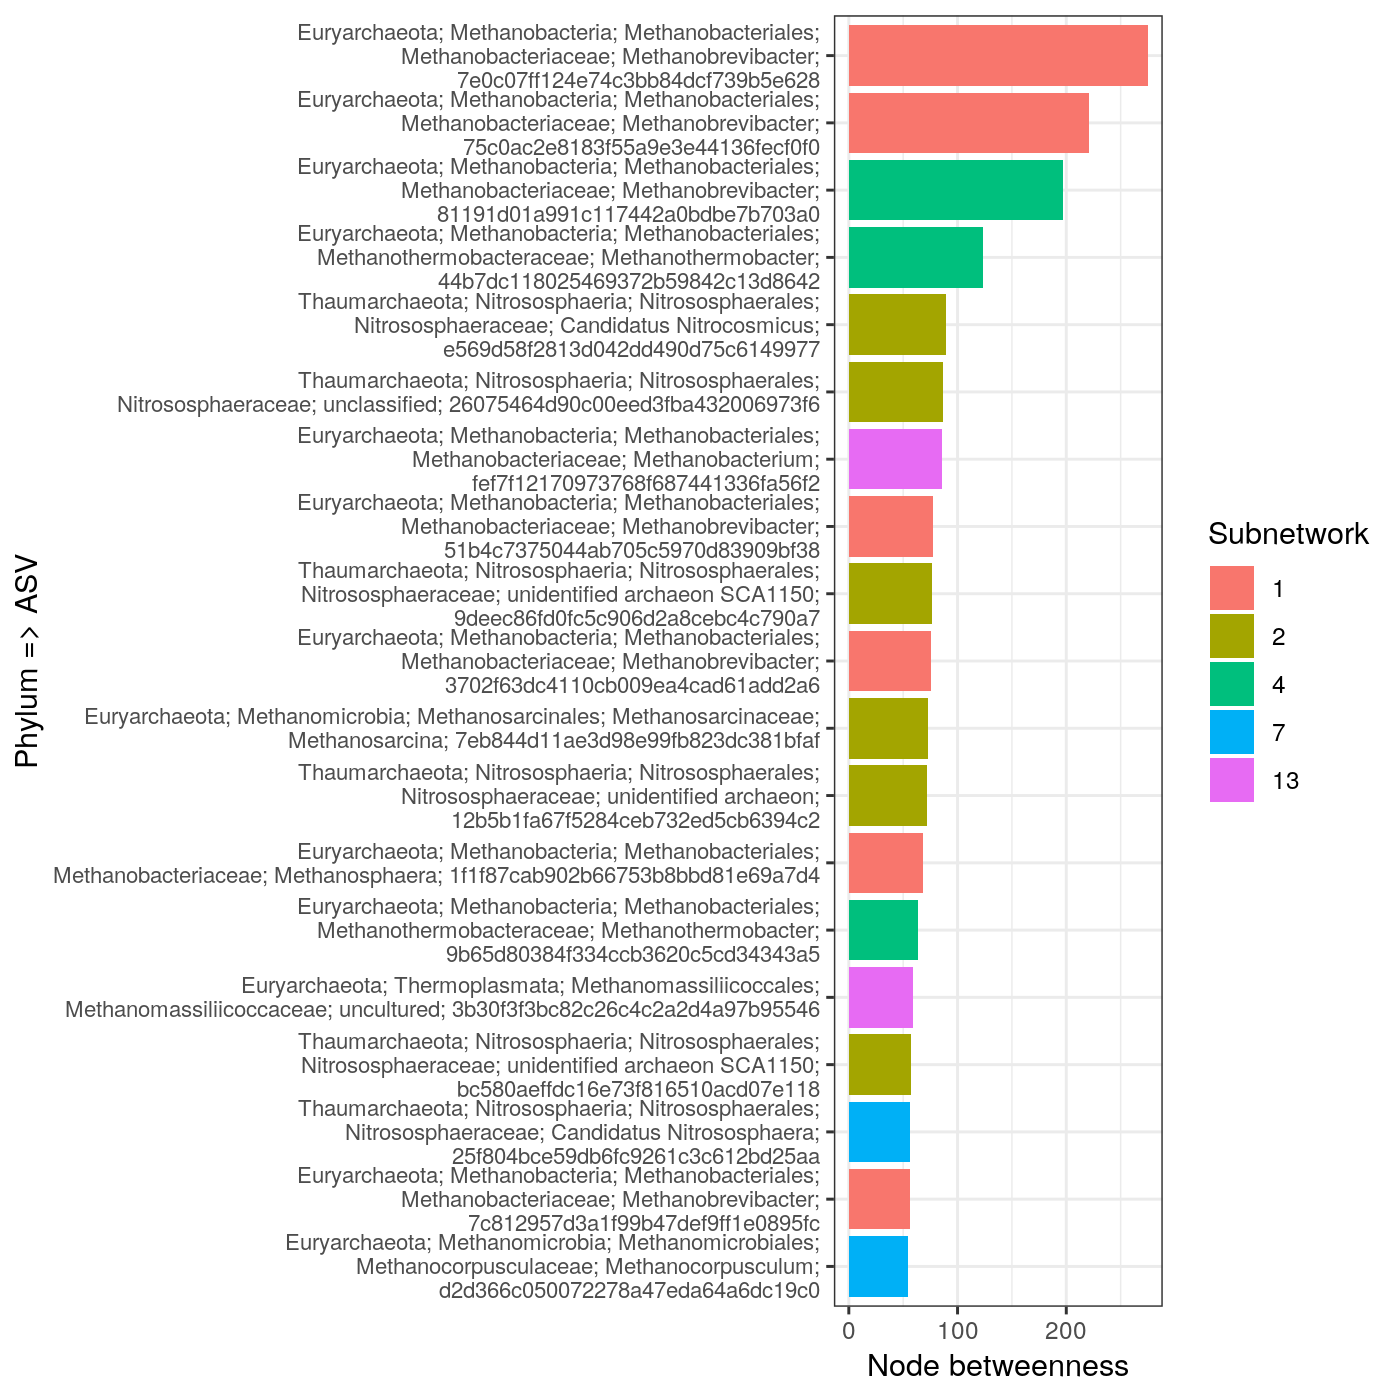

In [146]:
p = df %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 70),
           Taxonomy = Taxonomy %>% reorder(centrality_btw)) %>%
    ggplot(aes(Taxonomy, centrality_btw, fill=community)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Subnetwork') +
    labs(x='Phylum => ASV', y='Node betweenness') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    )

p.dims(7,7)
plot(p)

## Distribution of subnetworks across hosts

In [176]:
# graph nodes w/ subnetwork info
nodes = G_f %>% 
    activate(nodes) %>%
    as.data.frame
nodes

name                             Domain  Phylum        Class          
1   c5fbed2bb10ab3a08275a92e9caea3c1 Archaea Euryarchaeota Halobacteria   
2   1936b1a270b058c5754be0addc7c7c31 Archaea Euryarchaeota Halobacteria   
⋮   ⋮                                ⋮       ⋮             ⋮              
312 36fd5c55ad082f4d05194157da9d13da Archaea Euryarchaeota Methanobacteria
313 d7dd0bdd8184f8cb7189e1e09afa97d0 Archaea Euryarchaeota Methanobacteria
    Order              Family              Genus              Species          
1   Halobacteriales    Haloferacaceae      Halohasta          unclassified     
2   Halobacteriales    Haloferacaceae      Halohasta          unclassified     
⋮   ⋮                  ⋮                   ⋮                  ⋮                
312 Methanobacteriales Methanobacteriaceae Methanobrevibacter unclassified     
313 Methanobacteriales Methanobacteriaceae Methanobrevibacter Haemonchus placei
    centrality_btw centrality_hub centrality_degree community d       
1   0.0000000      5.050953e-17   0.1818182         3         22.25000
2   0.3051948      0.000000e+00   0.1818182         3         22.38095
⋮   ⋮              ⋮              ⋮                 ⋮         ⋮       
312 0              3.857912e-18   0                 12        9       
313 0              1.928956e-18   0                 23        3

In [241]:
# OTU abundance & sample metadata
otu_f = otu %>%
    mutate(OTU = rownames(.)) %>%
    gather(sample, abundance, -OTU) %>%
    mutate(abundance = abundance * 100) %>%
    inner_join(meta, c('sample'='SampleID')) %>%
    inner_join(nodes, c('OTU'='name'))

otu_f %>% .$OTU %>% unique %>% length
otu_f

[1] 313

OTU                              sample           abundance
1     c5fbed2bb10ab3a08275a92e9caea3c1 F14_Common_Bream 0        
2     1936b1a270b058c5754be0addc7c7c31 F14_Common_Bream 0        
⋮     ⋮                                ⋮                ⋮        
57904 36fd5c55ad082f4d05194157da9d13da X67_European_Roe 0        
57905 d7dd0bdd8184f8cb7189e1e09afa97d0 X67_European_Roe 0        
      class          order         family     genus     scientific_name    
1     Actinopterygii Cypriniformes Cyprinidae Abramis   Abramis_brama      
2     Actinopterygii Cypriniformes Cyprinidae Abramis   Abramis_brama      
⋮     ⋮              ⋮             ⋮          ⋮         ⋮                  
57904 Mammalia       Artiodactyla  Cervidae   Capreolus Capreolus_capreolus
57905 Mammalia       Artiodactyla  Cervidae   Capreolus Capreolus_capreolus
      diet      digestive_system ⋯ Class           Order             
1     omnivore  simple           ⋯ Halobacteria    Halobacteriales   
2     omnivore  simple           ⋯ Halobacteria    Halobacteriales   
⋮     ⋮         ⋮                ⋱ ⋮               ⋮                 
57904 herbivore foregut          ⋯ Methanobacteria Methanobacteriales
57905 herbivore foregut          ⋯ Methanobacteria Methanobacteriales
      Family              Genus              Species           centrality_btw
1     Haloferacaceae      Halohasta          unclassified      0.0000000     
2     Haloferacaceae      Halohasta          unclassified      0.3051948     
⋮     ⋮                   ⋮                  ⋮                 ⋮             
57904 Methanobacteriaceae Methanobrevibacter unclassified      0             
57905 Methanobacteriaceae Methanobrevibacter Haemonchus placei 0             
      centrality_hub centrality_degree community d       
1     5.050953e-17   0.1818182         3         22.25000
2     0.000000e+00   0.1818182         3         22.38095
⋮     ⋮              ⋮                 ⋮         ⋮       
57904 3.857912e-18   0                 12        9       
57905 1.928956e-18   0                 23        3

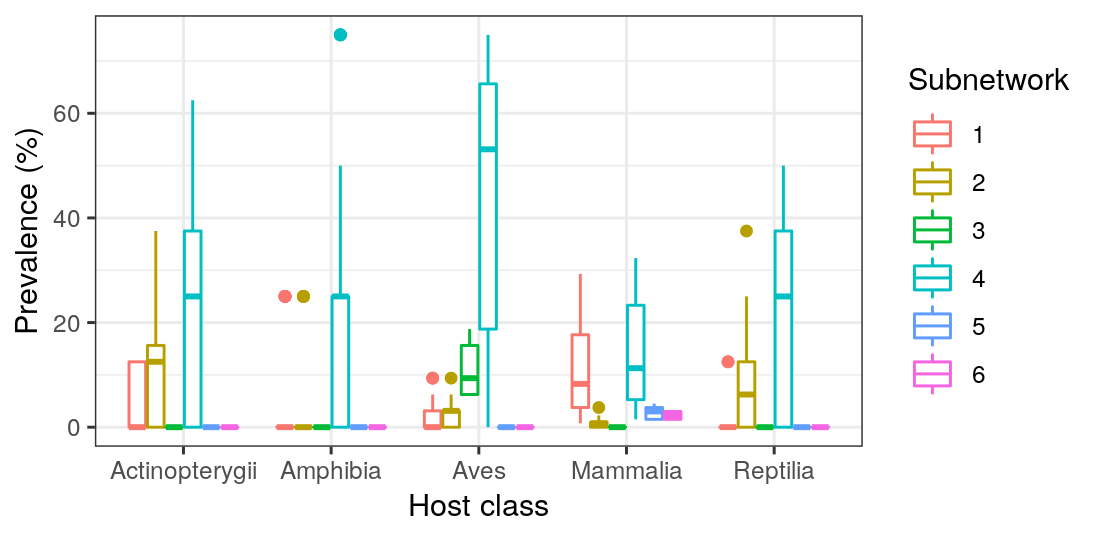

In [244]:
# plotting prevalence
p = otu_f %>%
    group_by(class) %>%
    mutate(n_samples = sample %>% unique %>% length) %>%
    group_by(community, class, OTU) %>%
    summarize(prev = sum(abundance > 0) / first(n_samples) * 100) %>%
    ungroup() %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Subnetwork = community %>% as.character) %>%
    ggplot(aes(class, prev, color=Subnetwork)) +
    geom_boxplot() +
    labs(x='Host class', y='Prevalence (%)') +
    theme_bw()

p.dims(5.5,2.7)
plot(p)

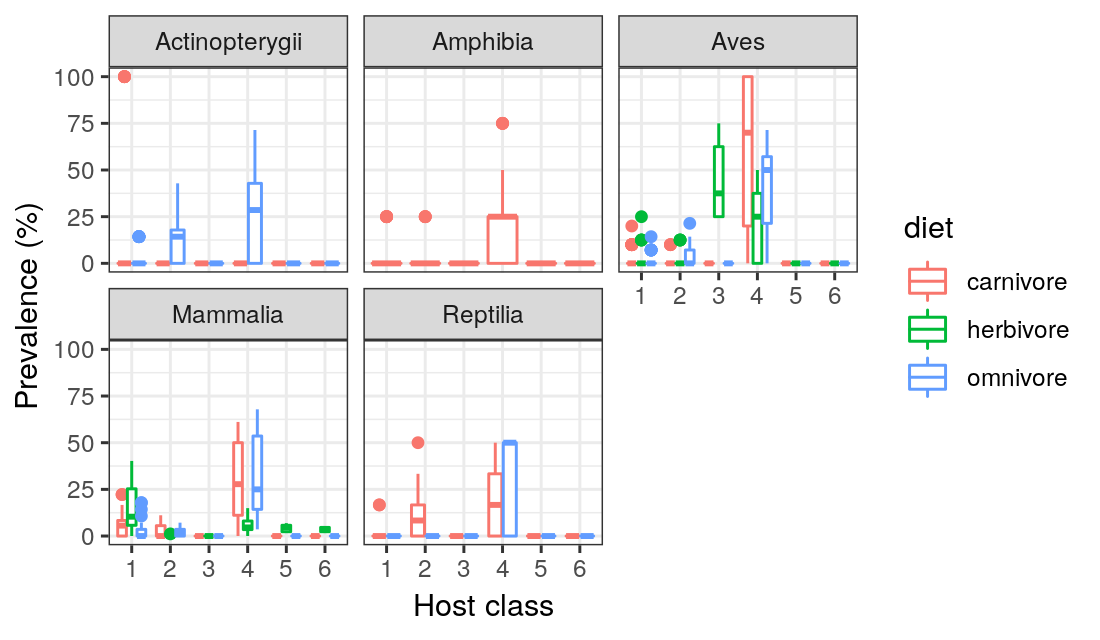

In [256]:
# plotting prevalence
p = otu_f %>%
    group_by(class, diet) %>%
    mutate(n_samples = sample %>% unique %>% length) %>%
    group_by(community, class, diet, OTU) %>%
    summarize(prev = sum(abundance > 0) / first(n_samples) * 100) %>%
    ungroup() %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Subnetwork = community %>% as.character) %>%
    ggplot(aes(Subnetwork, prev, color=diet)) +
    geom_boxplot() +
    labs(x='Host class', y='Prevalence (%)') +
    facet_wrap(~ class) +
    theme_bw() 

p.dims(5.5,3.2)
plot(p)

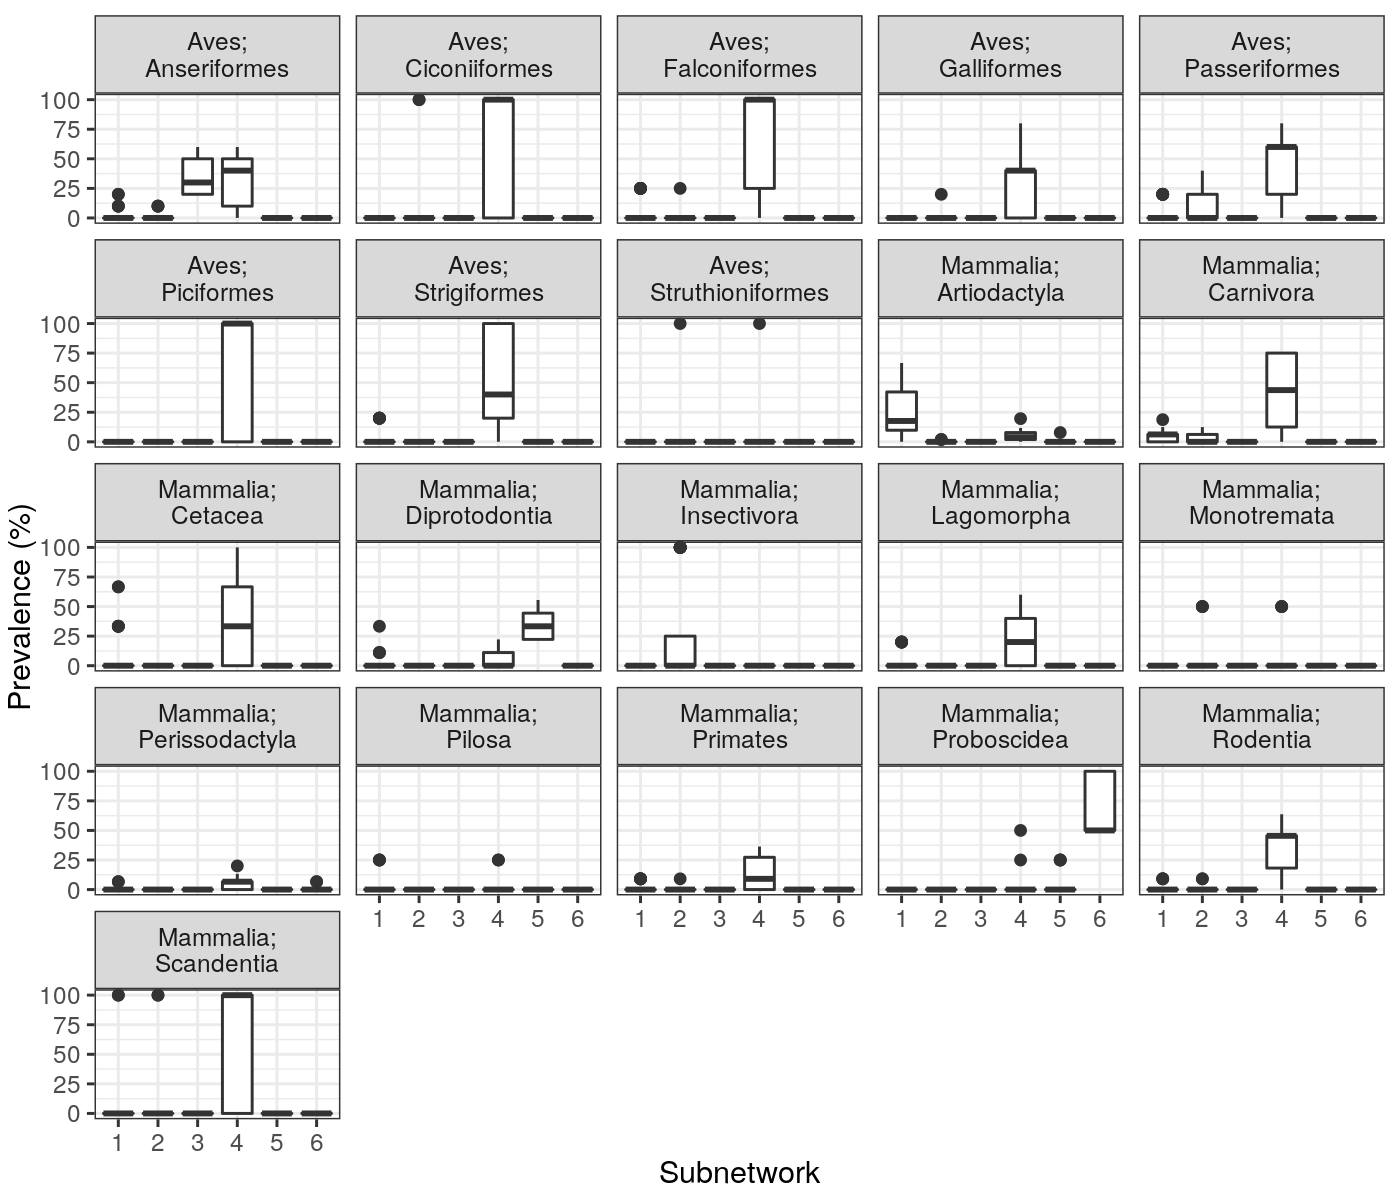

In [276]:
# plotting prevalence
p = otu_f %>%
    filter(class %in% c('Mammalia', 'Aves')) %>%
    mutate(class = paste(class, order, sep=';\n')) %>%
    group_by(class) %>%
    mutate(n_samples = sample %>% unique %>% length) %>%
    group_by(community, class, OTU) %>%
    summarize(prev = sum(abundance > 0) / first(n_samples) * 100) %>%
    ungroup() %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Subnetwork = community %>% as.character) %>%
    ggplot(aes(Subnetwork, prev)) +
    geom_boxplot() +
    labs(x='Subnetwork', y='Prevalence (%)') +
    facet_wrap(~ class) +
    theme_bw() 

p.dims(7,6)
plot(p)

# sessionInfo

In [193]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-eco/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] uuid_0.1-2        LeyLabRMisc_0.1.6 doParallel_1.0.15 iterators_1.0.12 
 [5] foreach_1.4.7     clustermq_0.8.9   ggraph_2.0.3      tidygraph_1.2.0  
 [9] cooccur_1.3       phyloseq_1.30.0   ape_5.3           tidytable_0.4.1  
[13] ggplot2_3.2.1     tidyr_1.0.0